# Curso de Clustering con Python y scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy 
import pyspark 
import seaborn as sns

import sklearn 

## Ejemplo Introductorio

In [2]:
# Para este ejemplo, haremos uso de un conjunto de datos generado con la función make_blobs de sklearn.
# Este conjunto de datos tiene 100 observaciones, 2 características y 4 grupos. 
# La desviación estándar de cada grupo es diferente, por lo que los grupos no son perfectamente circulares.

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=7, cluster_std=[1,1.5,2,2])

# La variable X es un array de numpy con las características (2) de cada observación.
# La variable y es un array de numpy con la etiqueta de cada observación.

In [3]:
#Convertimos estos datos en un df de Pandas:
df = pd.DataFrame({"x1":X[:,0], "x2":X[:,1], "y":y})
df.head()

x1        x2  y
0  -3.384261  5.221740  1
1  -1.836238 -7.735384  3
2  -7.456176  6.198874  0
3  -1.785043  1.609749  1
4 -10.124910  6.133805  0

C:\Users\eespitia\AppData\Local\Temp\ipykernel_6584\2040011149.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


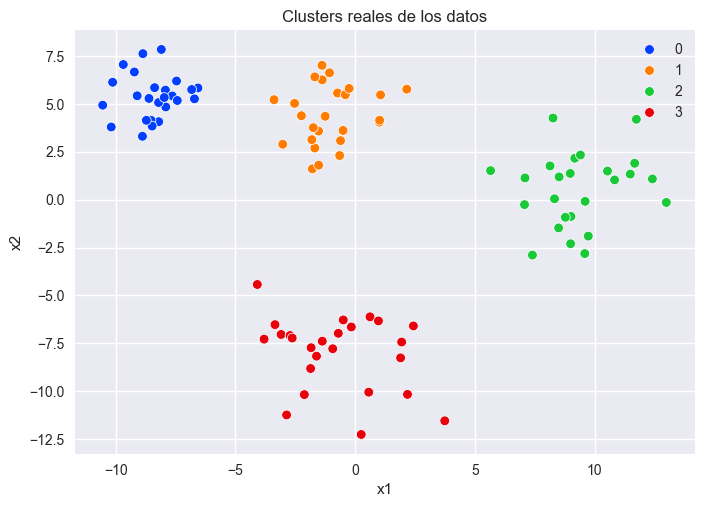

In [4]:
plt.style.use("seaborn")

sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue="y",
    palette="bright"
)
plt.legend(loc='upper right')
plt.title("Clusters reales de los datos")
plt.show()

Ahora, aplicamos nuestro modelo:

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=7)

y_predict = kmeans.fit_predict(X)

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\eespitia\AppData\Local\Temp\ipykernel_6584\1866313175.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


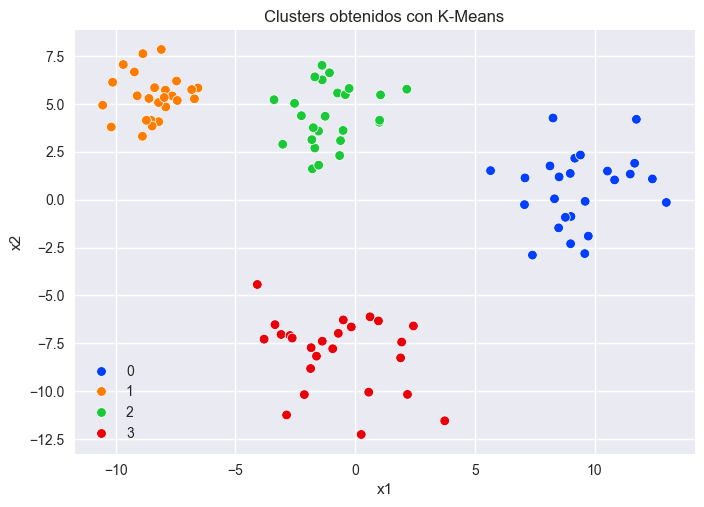

In [6]:
# Ahora, visualizamos las clasificaciones obtenidas_
plt.style.use("seaborn")

sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue=y_predict,
    palette="bright"
)
plt.title("Clusters obtenidos con K-Means")
plt.show()

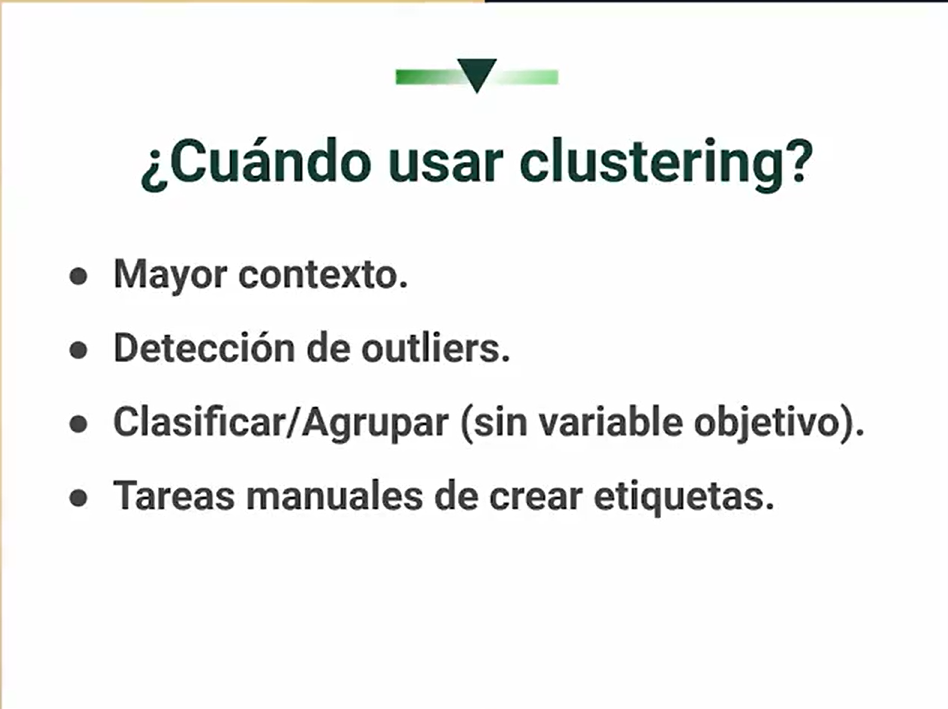

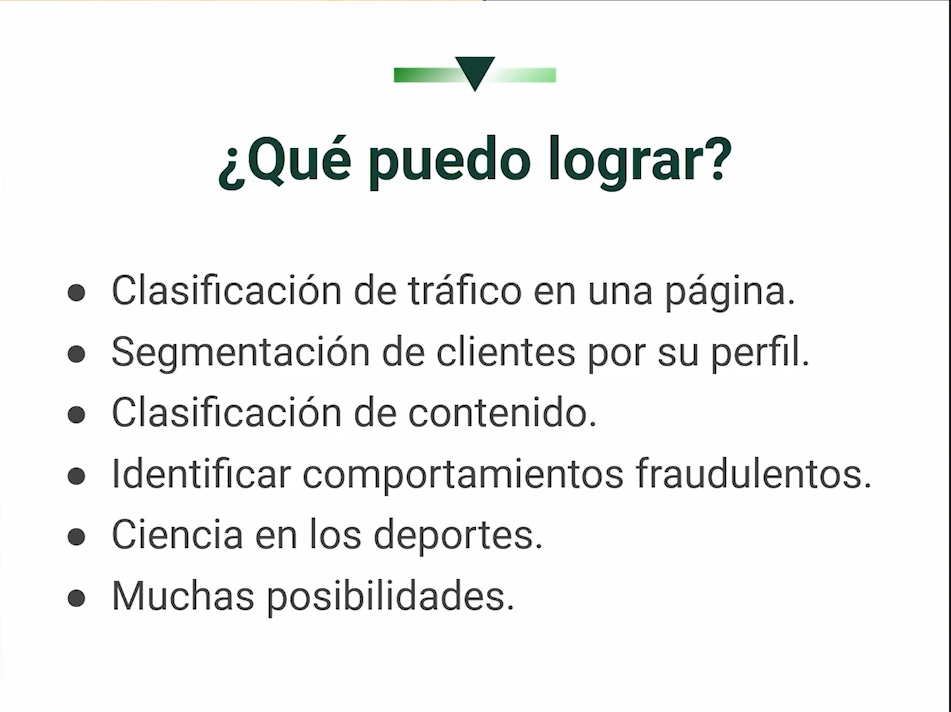

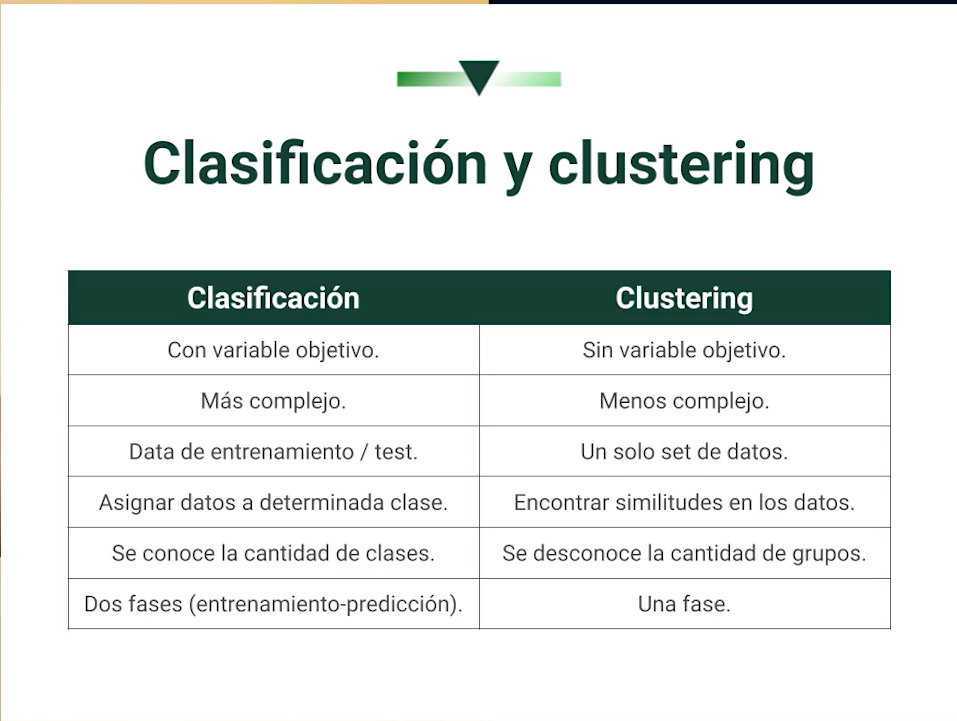

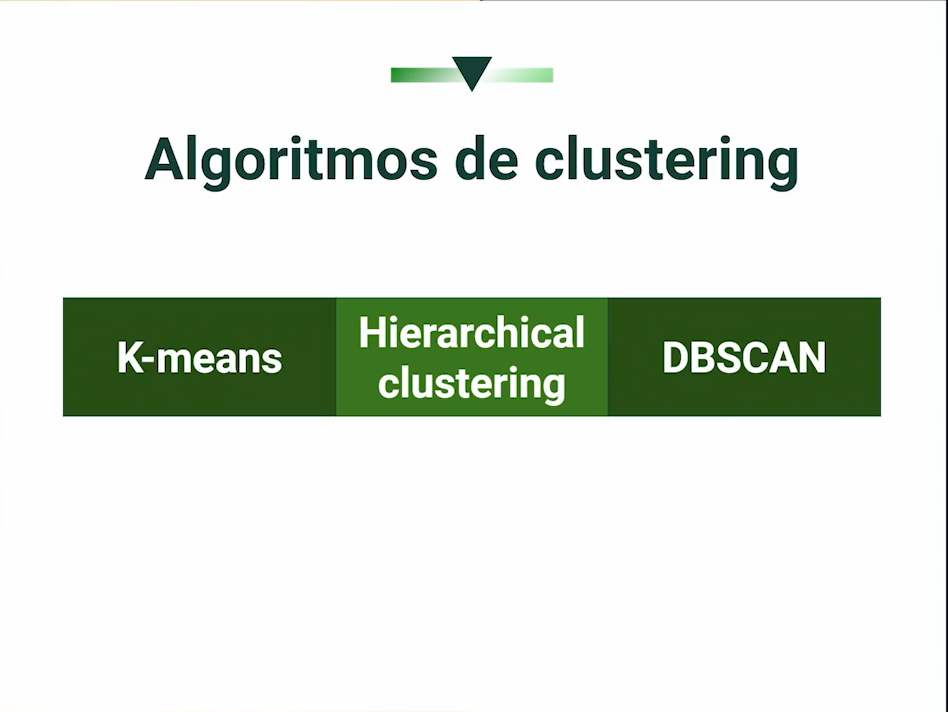

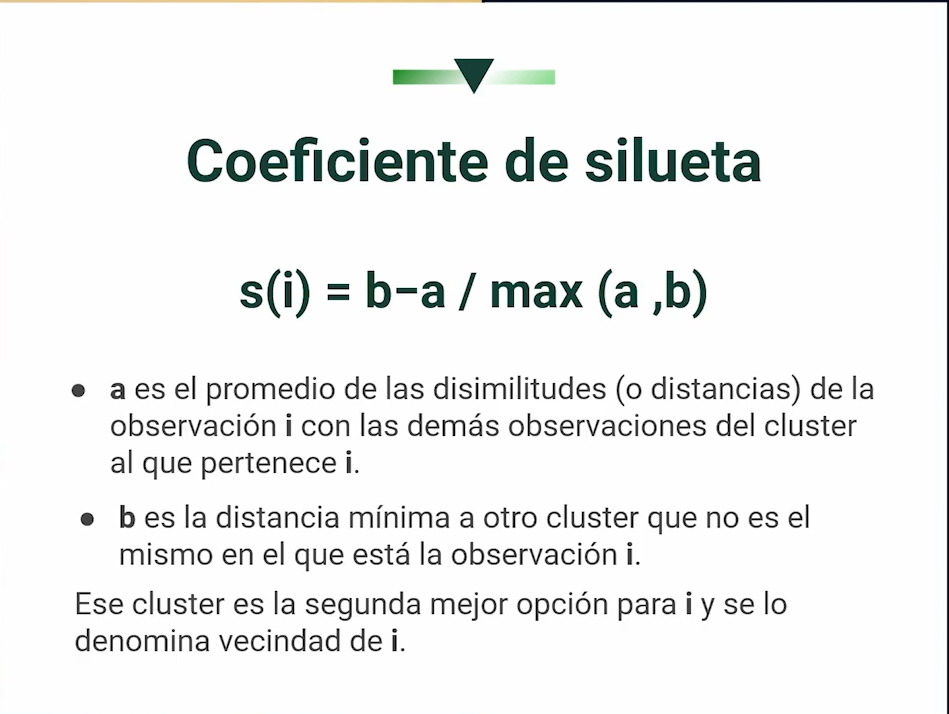

El coeficiente de silueta va de -1 a 1, en donde valores negativos representan overlaping con otros custers y valores positivos representan una separación más evidente.
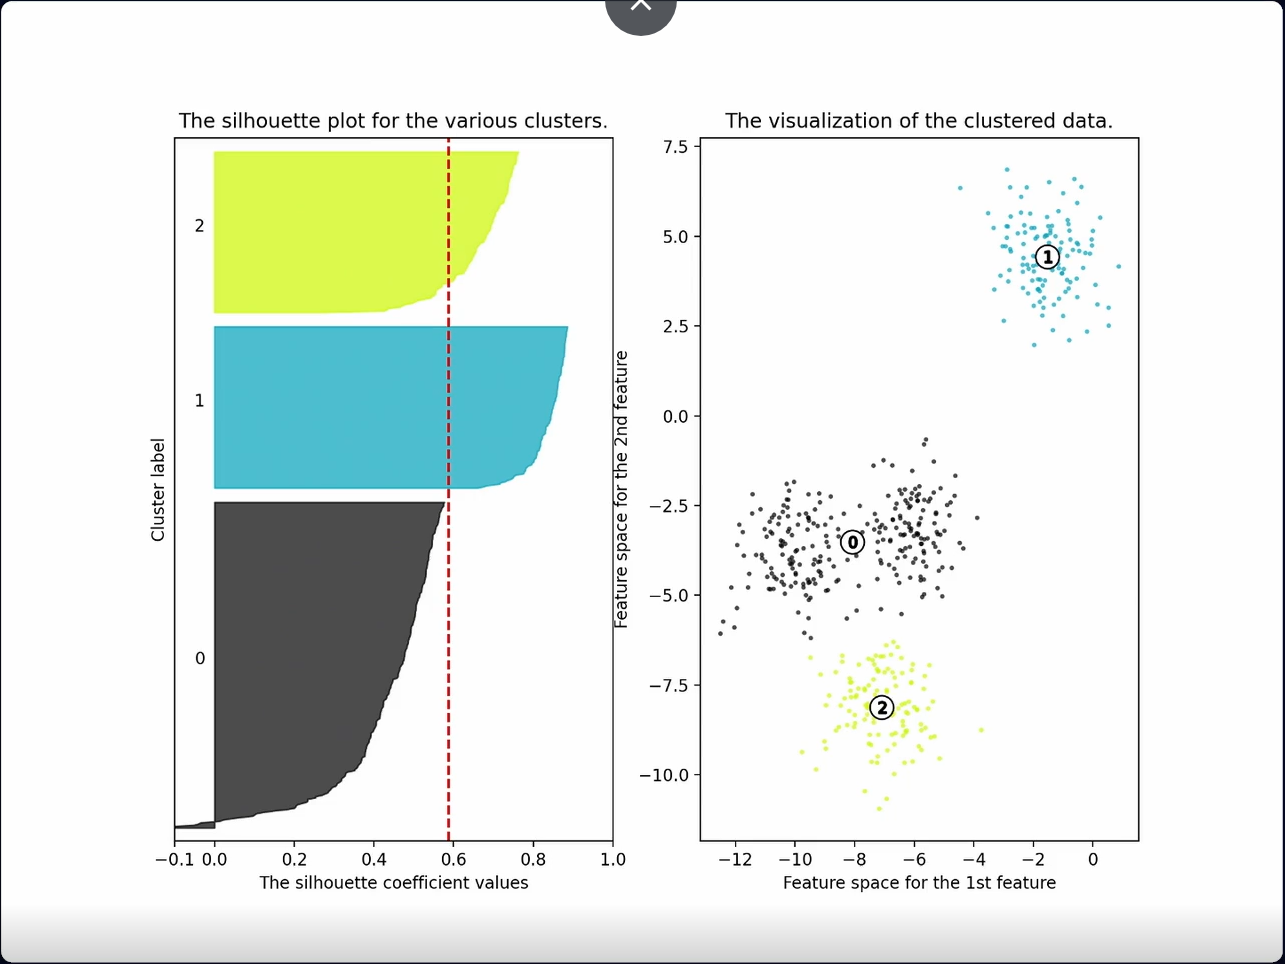

En el video de "Cómo evaluar modelos de clustering", se muestra un ejemplo de jugete de cómo cálcular el coeficiente de silueta

### ALgoritmo de K-Means

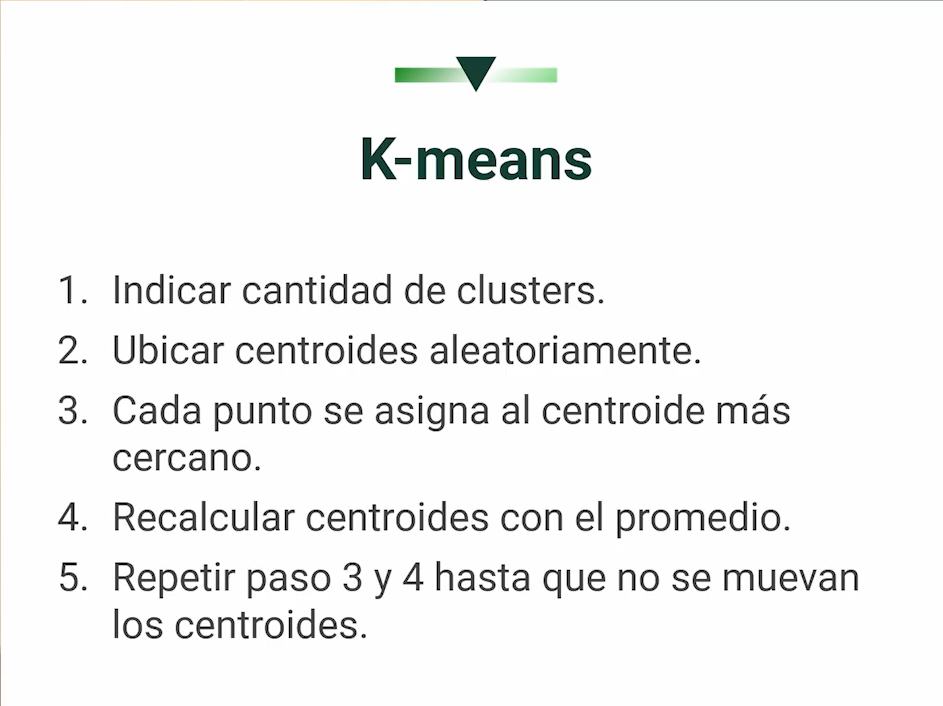

El algoritmo busca minimizar la distancia de cada punto a su centroide: 
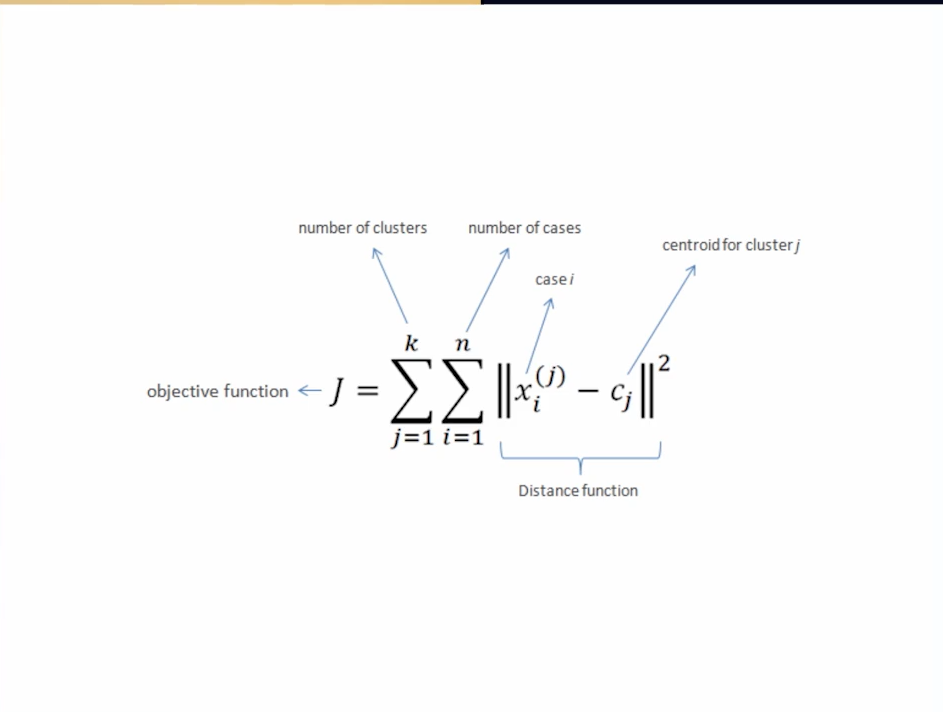

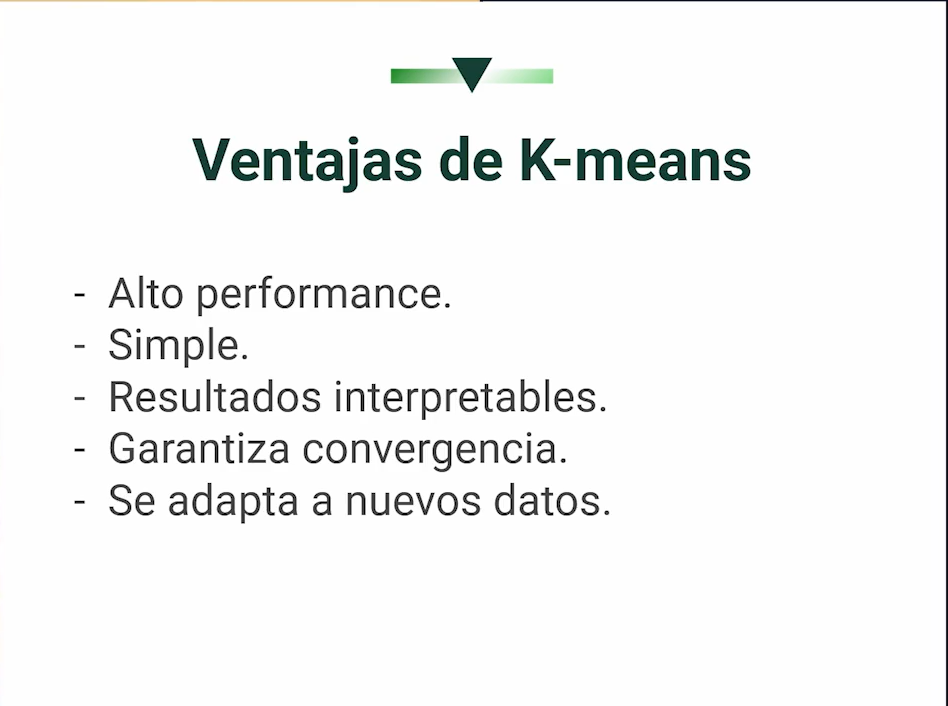

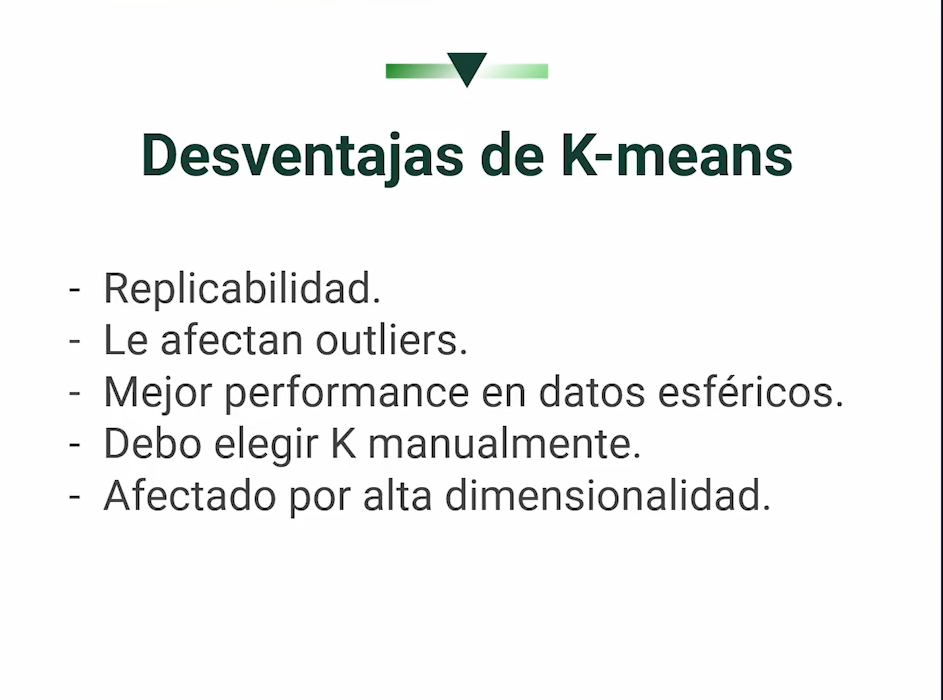

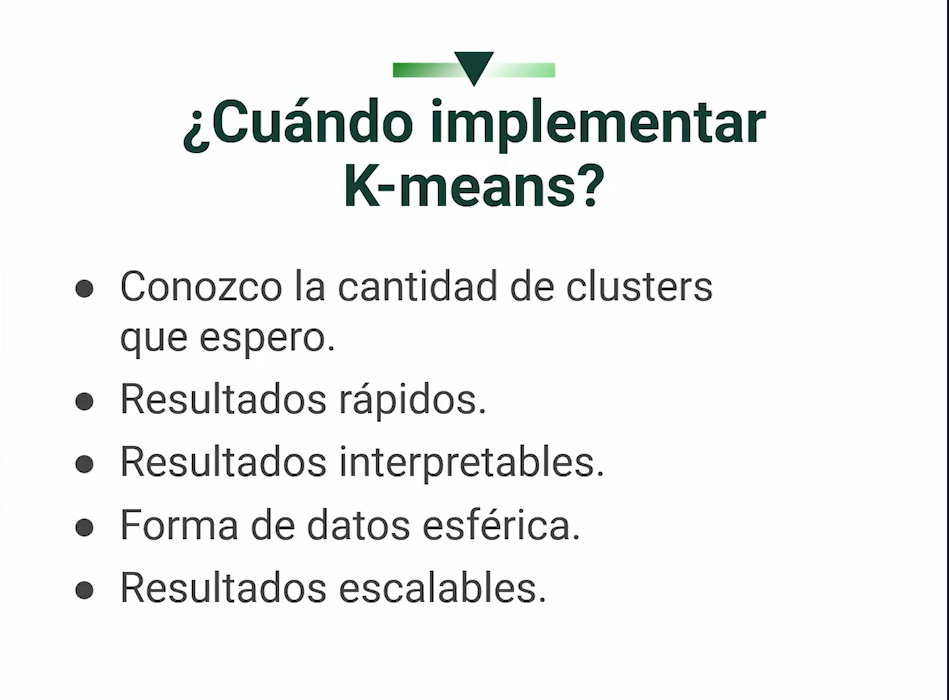

### Implementación completa de K-Means

In [7]:
# Generación de datos
from sklearn.datasets import make_blobs

# K-means
from sklearn.cluster import KMeans

# Métricas
from sklearn.metrics import silhouette_score

In [8]:
# Generamos nuestro datos:
X, y, c= make_blobs(n_samples=500, centers=4, n_features=2, random_state=7, cluster_std=0.8, return_centers=True)
# X es un array de numpy con las características (2) de cada observación.
# y es un array de numpy con la etiqueta de cada observación.
# c es un array de numpy con las coordenadas de los centroides de cada cluster.

In [9]:
# Creamos un pd.DataFrame con los datos:
df = pd.DataFrame(
    {"x1":X[:,0], 
    "x2":X[:,1], 
    "y":y}
)
df.head()

x1        x2  y
0 -0.320970  4.338705  1
1 -2.231586  3.271233  1
2 -8.559968  4.477236  0
3  0.111800  3.987295  1
4 -0.557967 -9.808574  3

In [10]:
# Creamos un df con las coordenadas de los centroides:
centroides = pd.DataFrame(
    {"x1":c[:,0], 
    "x2":c[:,1]}
)
centroides.head()

x1        x2
0 -8.473834  5.598376
1 -1.231815  4.469304
2  9.559790  0.769917
3  0.022409 -8.558977

C:\Users\eespitia\AppData\Local\Temp\ipykernel_6584\1488595467.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


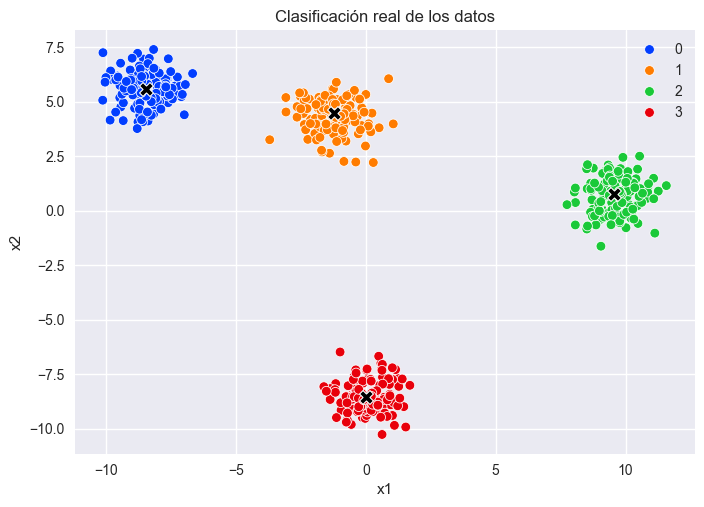

In [11]:
plt.style.use("seaborn")

#Graficamos los puntos
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue="y",
    palette="bright"
)

#Graficamos los centroides
sns.scatterplot(
    data=centroides,
    x="x1",
    y="x2",
    color="black",
    marker="X",
    s=100
)

plt.title("Clasificación real de los datos")
plt.show()

Aplicamos K-Means

kmeans = KMeans(n_clusters = 4)

In [12]:
Kmeans = KMeans(n_clusters=4, random_state=7)

y_predict = Kmeans.fit_predict(X)

# Añadimos esta columna a nuestro dataframe:
df["k_means"] = y_predict

# Creamos un df con las coordenadas de los centroides:
centroides = pd.DataFrame(
    {"x1":Kmeans.cluster_centers_[:,0], 
    "x2":Kmeans.cluster_centers_[:,1]}
)

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\eespitia\AppData\Local\Temp\ipykernel_6584\3787840241.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


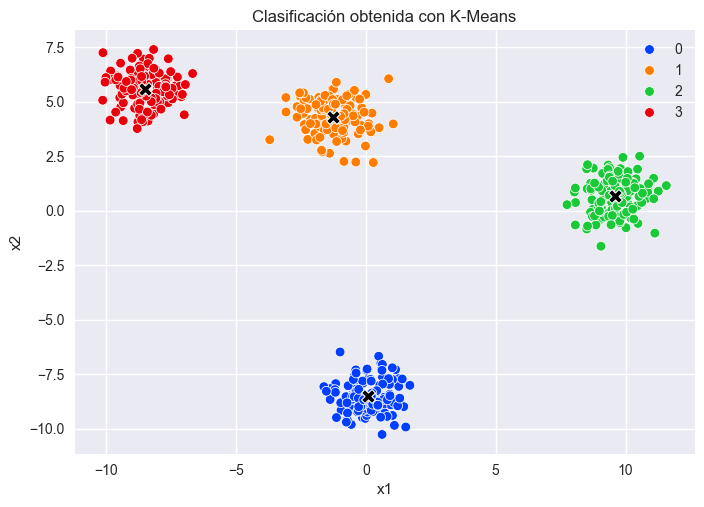

In [13]:
# Realizamos la gráfica
plt.style.use("seaborn")

#Graficamos los puntos
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue="k_means",
    palette="bright"
)

#Graficamos los centroides
sns.scatterplot(
    data=centroides,
    x="x1",
    y="x2",
    color="black",
    marker="X",
    s=100
)

plt.title("Clasificación obtenida con K-Means")
plt.show()

## Técnicas para encontrar el K

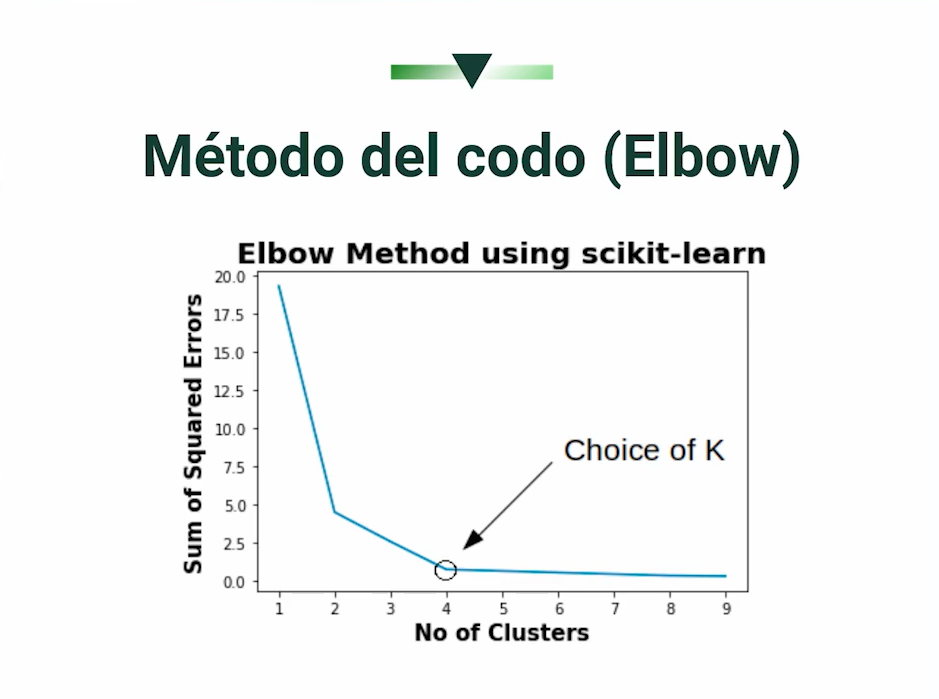

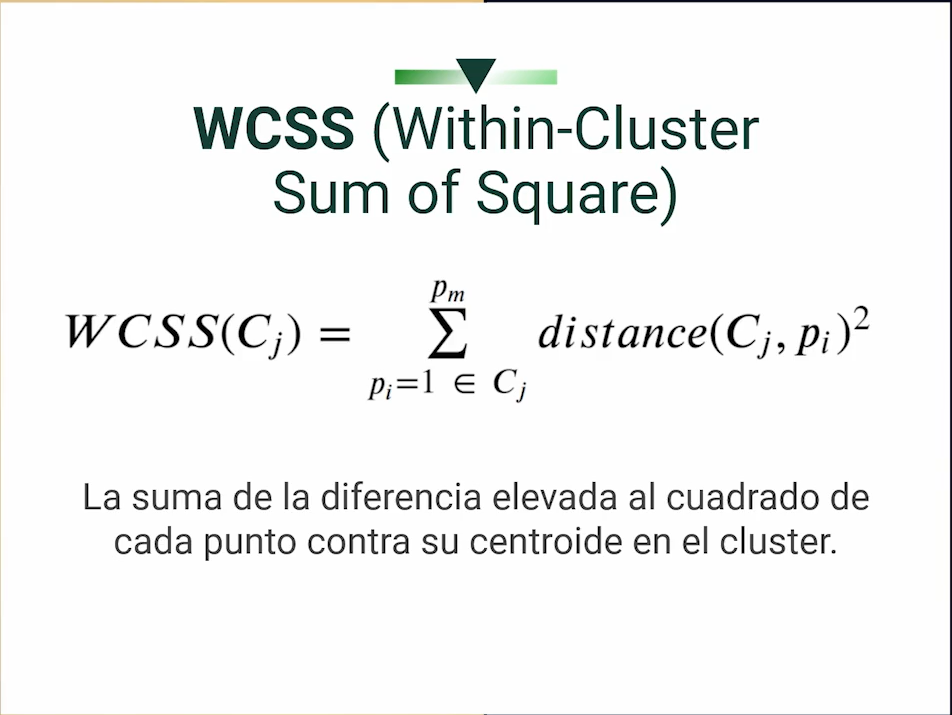

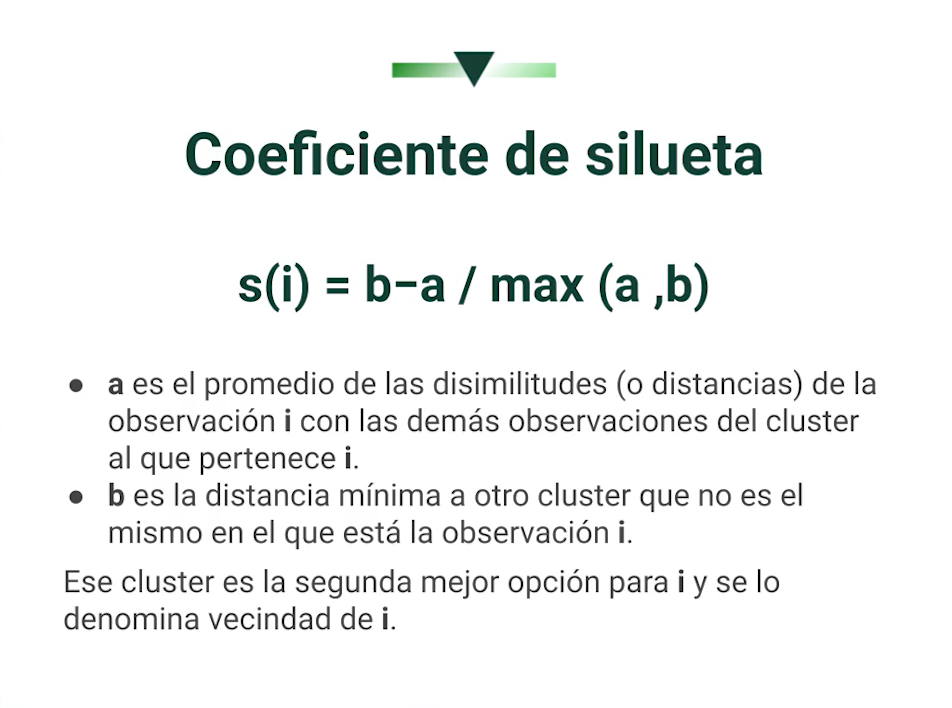

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

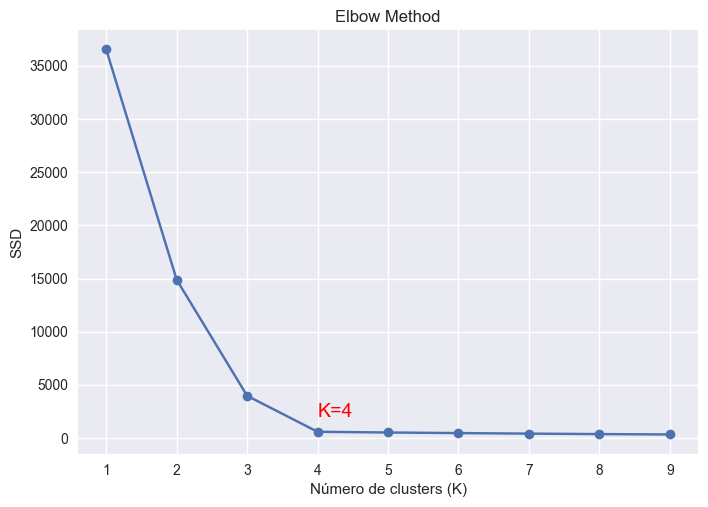

In [14]:
ssd = []   
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    ssd.append(km.inertia_)

plt.style.use("seaborn")

#plt.plot(K, ssd, "bx-")
plt.plot(K, ssd, marker="o")

plt.xlabel("Número de clusters (K)")
plt.ylabel("SSD")
plt.title("Elbow Method")

plt.text(4, 2000, "K=4", fontsize=14, color="red")
plt.show()

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

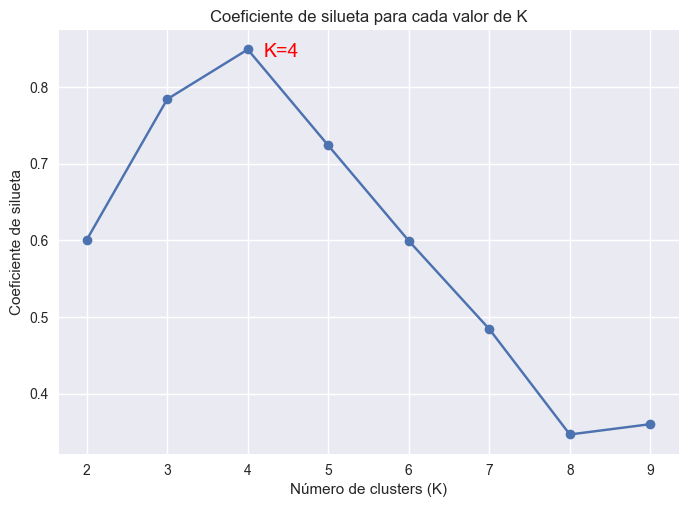

In [15]:
# Analogamente, podemo graficar el coeficiente de silueta para cada valor de K:
sil = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sil.append(silhouette_score(X, km.labels_))

plt.style.use("seaborn")

plt.plot(K, sil, marker="o")

plt.xlabel("Número de clusters (K)")
plt.ylabel("Coeficiente de silueta")
plt.title("Coeficiente de silueta para cada valor de K")

plt.text(4.2, 0.84, "K=4", fontsize=14, color="red")
plt.show()

# hierarchical clustering

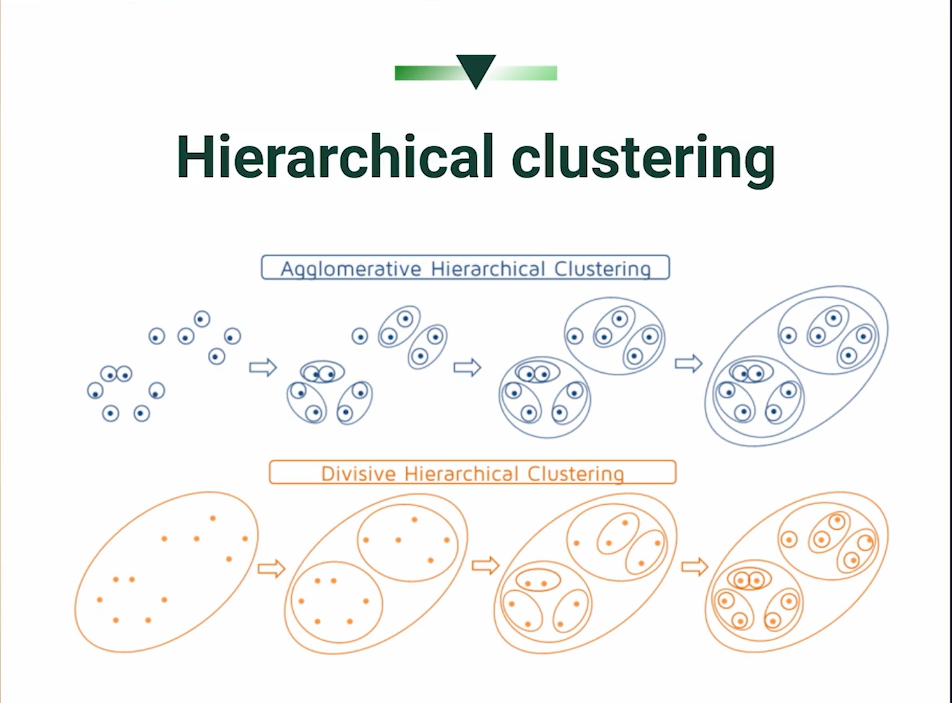

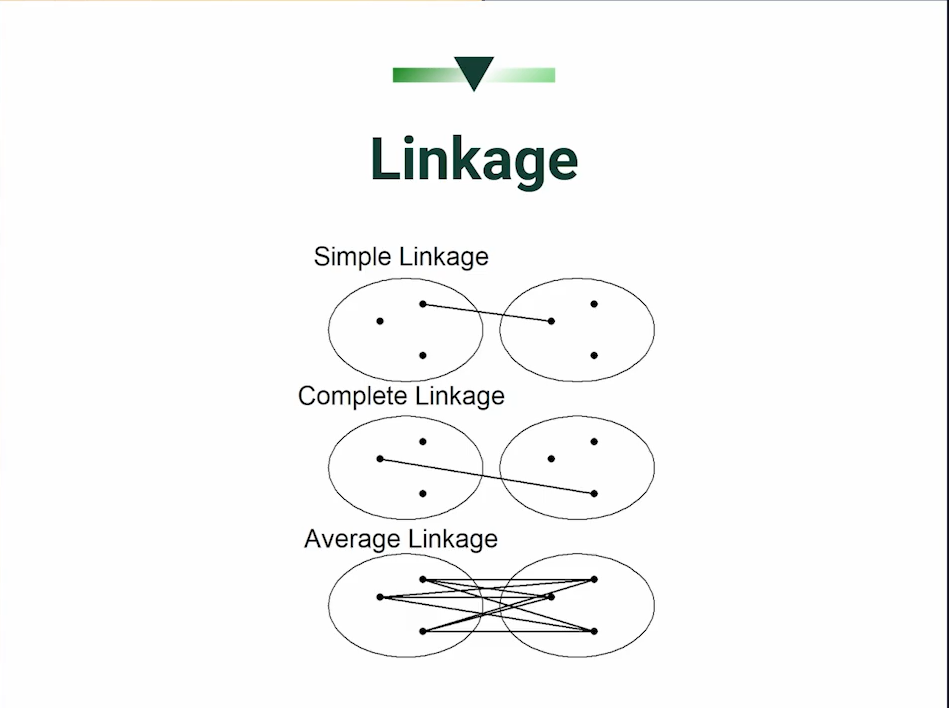

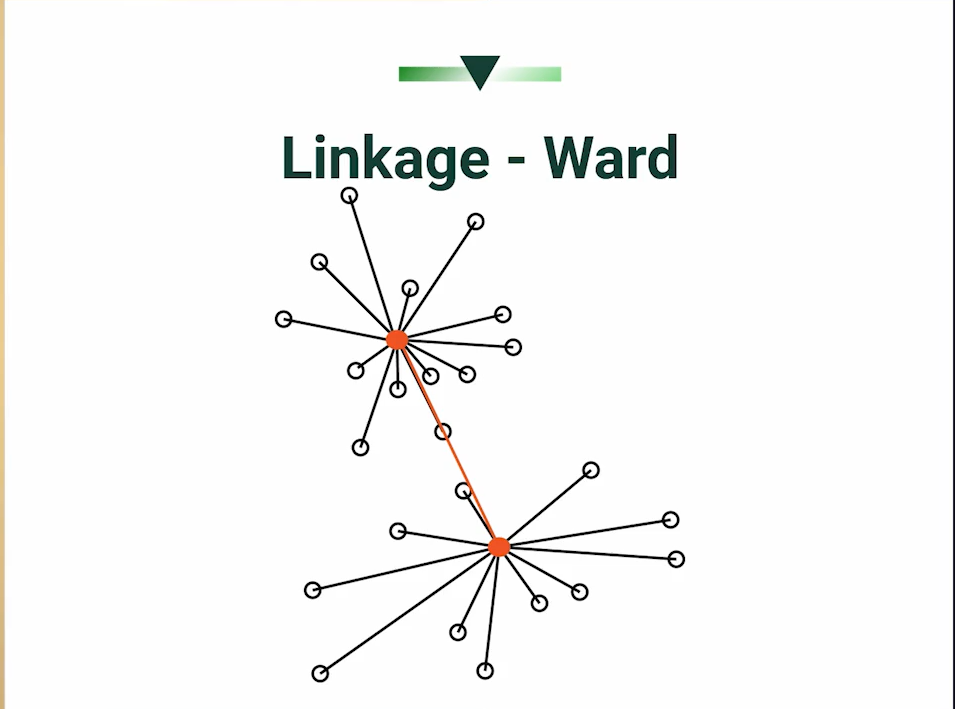

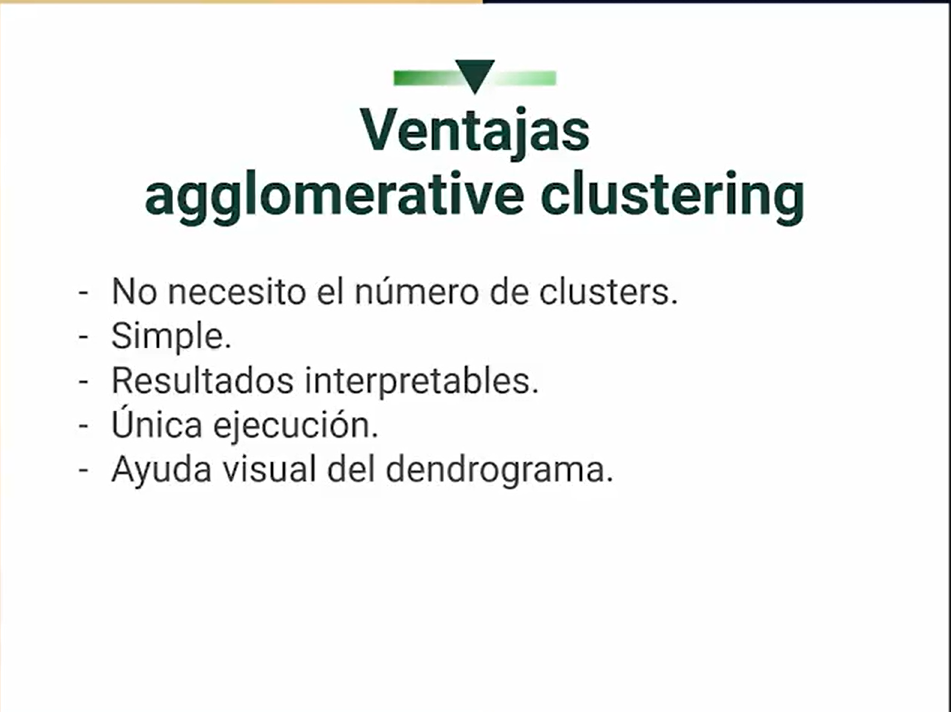

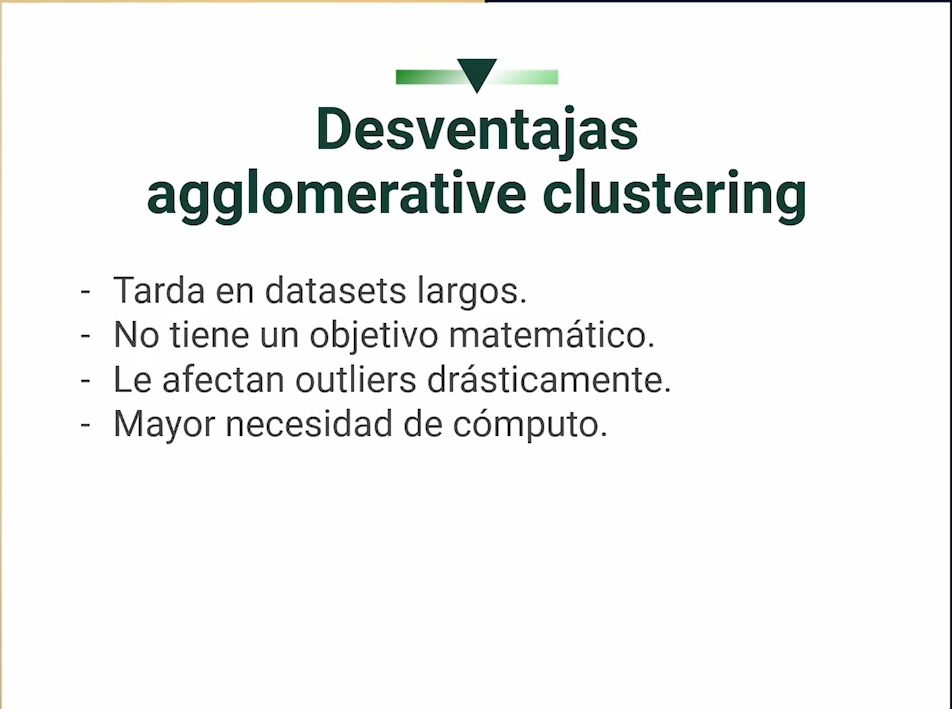

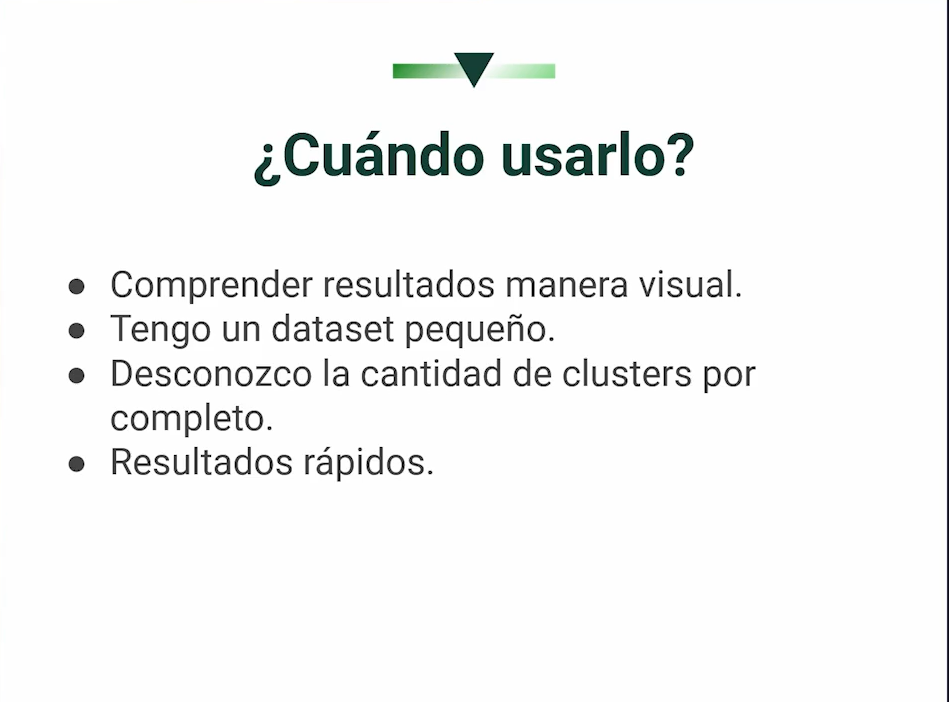

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
X, y, c = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42, cluster_std=0.8, return_centers=True)

In [18]:
# Creamos un dataframe con los datos
df_blob = pd.DataFrame(
    {
        "x1":X[:,0],
        "x2":X[:,1],
        "y":y
    }
)

# Creamos un dataframe con las coordenadas de los centroides
df_centroides = pd.DataFrame(
    {
        "x1":c[:,0],
        "x2":c[:,1]
    }
)

In [19]:
# Imprimimos los estilos disponibles en matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


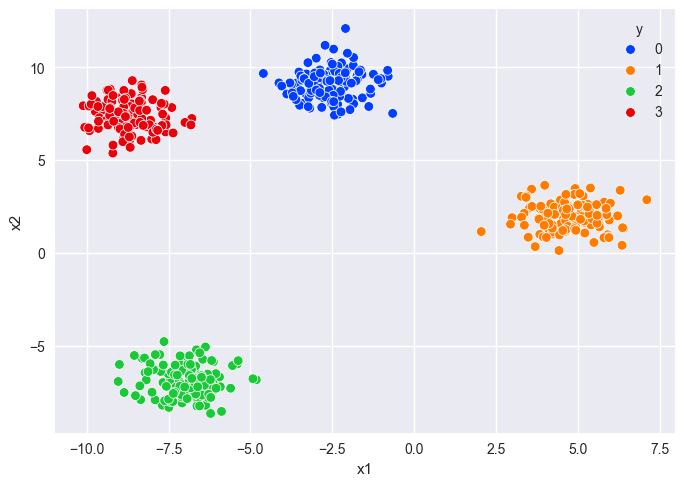

In [20]:
sns.scatterplot(
    data=df_blob,
    x="x1",
    y="x2",
    hue="y",
    palette="bright"
)
plt.show()

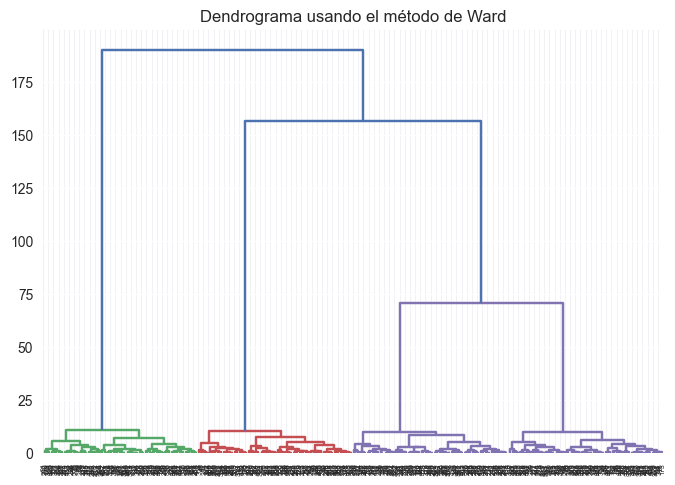

In [21]:
# Graficamos el dendrograma
dendrogram_plot = dendrogram(linkage(X, method="ward"))
plt.title("Dendrograma usando el método de Ward")
plt.show()

In [22]:
# Creamos el AgglomerativeClustering
agg  =AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
y_predict = agg.fit_predict(X)

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
# Guardamos las predicciones en el dataframe
df_blob["agg"] = y_predict

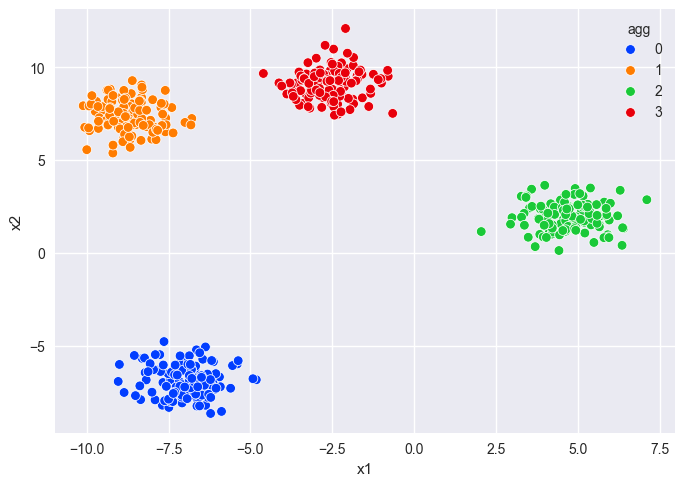

In [24]:
# Realizamos el gráfico
sns.scatterplot(
    data=df_blob,
    x="x1",
    y="x2",
    hue="agg",
    palette="bright"
)
plt.show()

In [25]:
# Calculamos el coeficiente de silueta
silhouette_score(X, y_predict)

0.8336135403234282

# DBSCAN

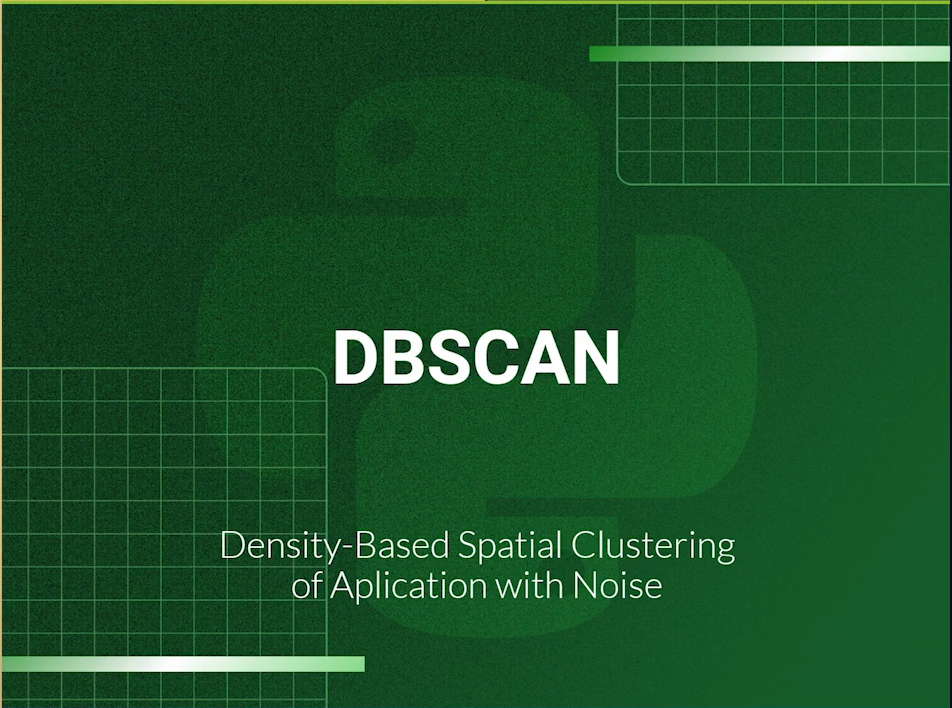

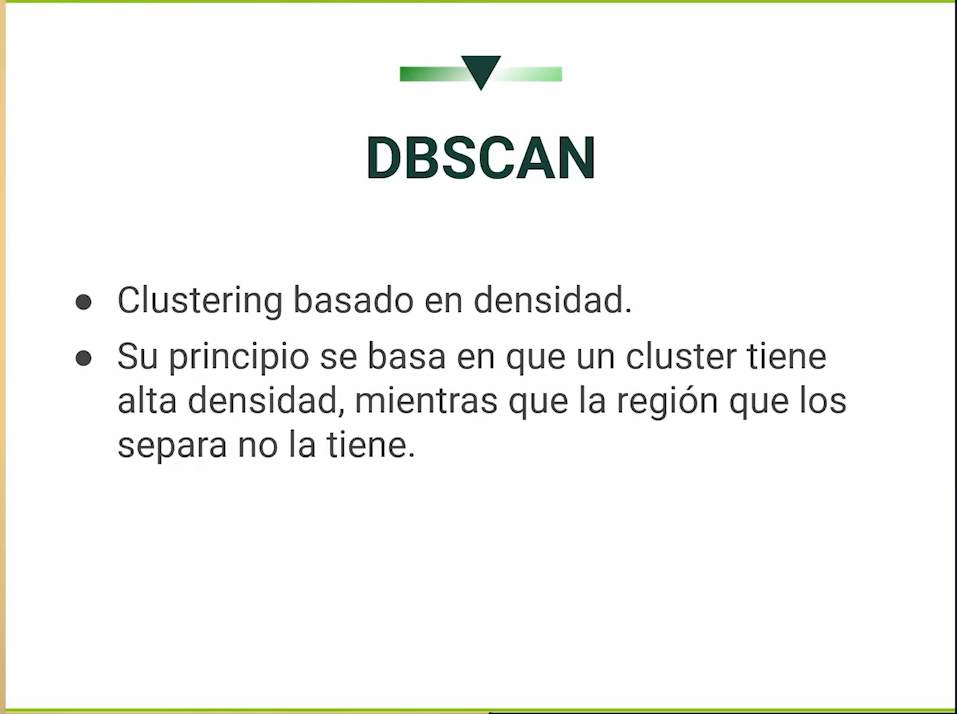

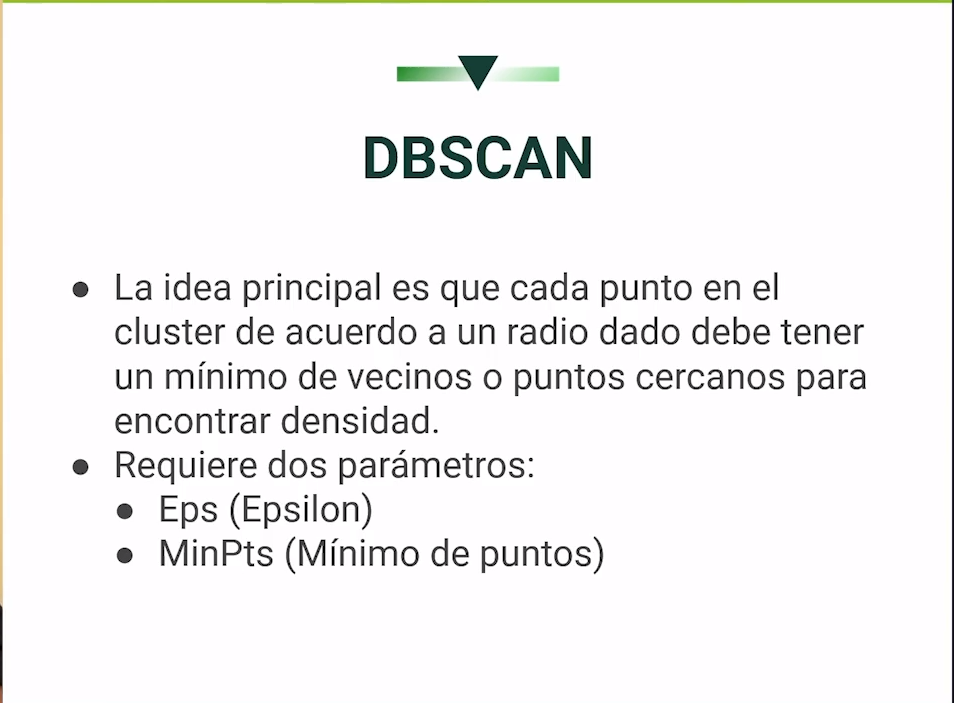

Tamaños pequeños hace que tarde mucho el algoritmo
Tamaños muy grandes puede hacer que el algoritmo no converja

Link para visualizar el comportamiento de DBSCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


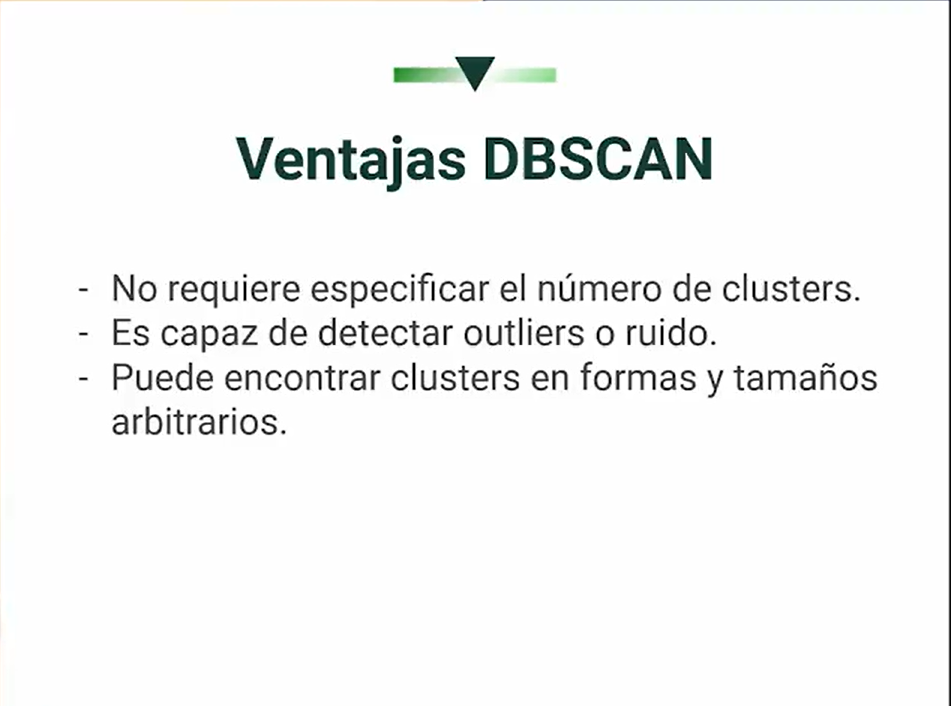

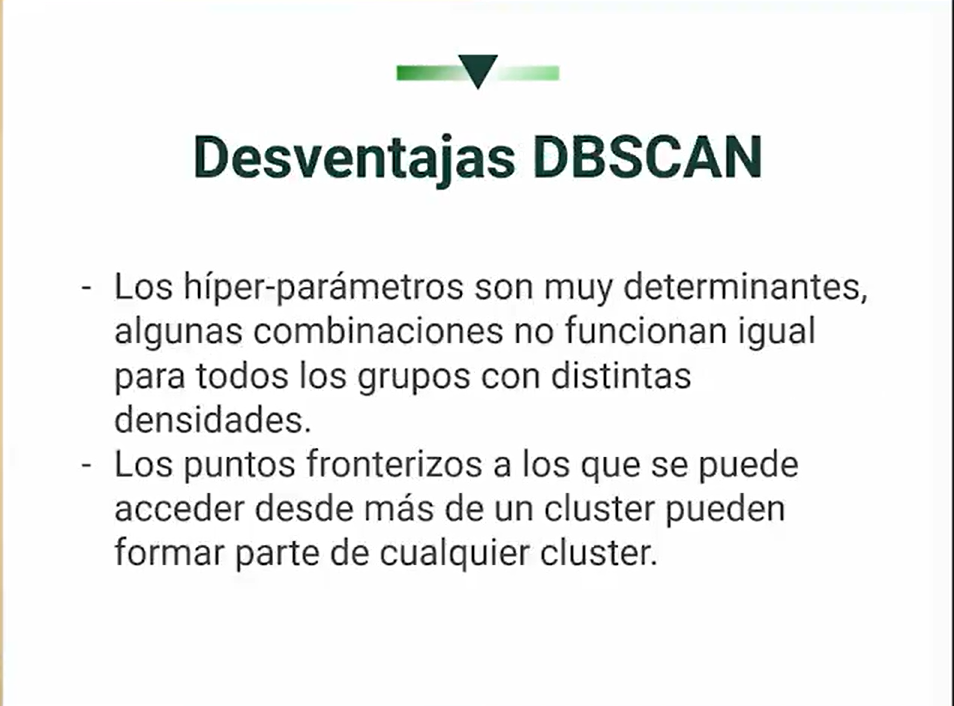

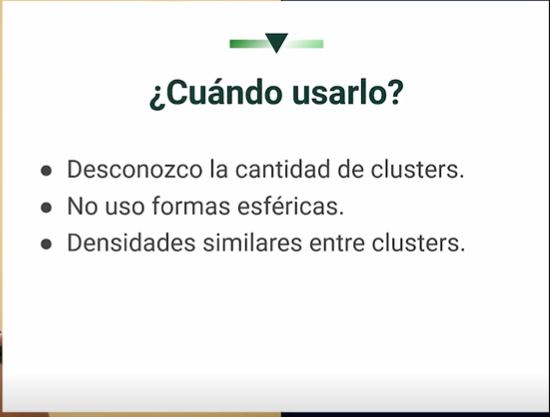

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [27]:
X, y, c = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.8, random_state=42, return_centers=True)

# Hacemos un dataframe con los datos

df_blob = pd.DataFrame(
    {
        "x_1":X[:,0],
        "x_2":X[:,1],
        "y":y
    }
)

df_centroides = pd.DataFrame(
    {
        "x_1":c[:,0],
        "x_2":c[:,1]
    }
)

In [28]:
# Creamos las lunas:

X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42) 

df_moons = pd.DataFrame(
    {
        "x_1":X_m[:,0],
        "x_2":X_m[:,1],
        "y_m":y_m
    }
)

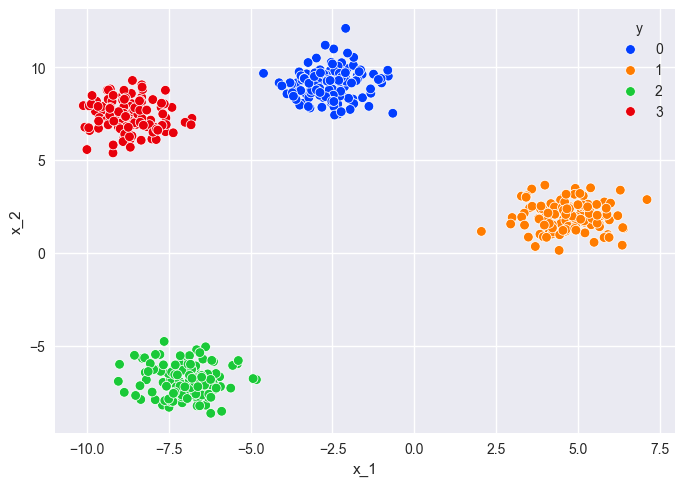

In [29]:
# Graficamos los blobs
sns.scatterplot(
    data=df_blob,
    x="x_1",
    y="x_2",
    hue="y",
    palette="bright"
)
plt.show()

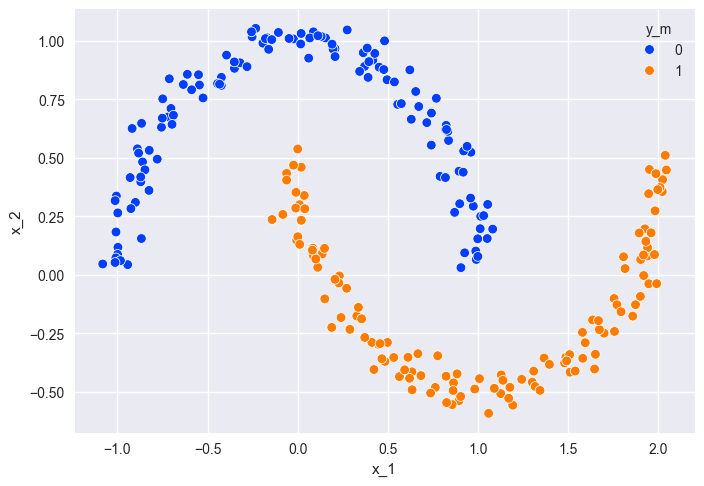

In [30]:
# Graficamos las lunas

sns.scatterplot(
    data=df_moons,
    x="x_1",
    y="x_2",
    hue="y_m",
    palette="bright"
)
plt.show()

In [31]:
# Implementamos el modelo DBSCAN para las lunas
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_predict_moons = dbscan.fit_predict(X_m)
df_moons["dbscan"] = y_predict_moons

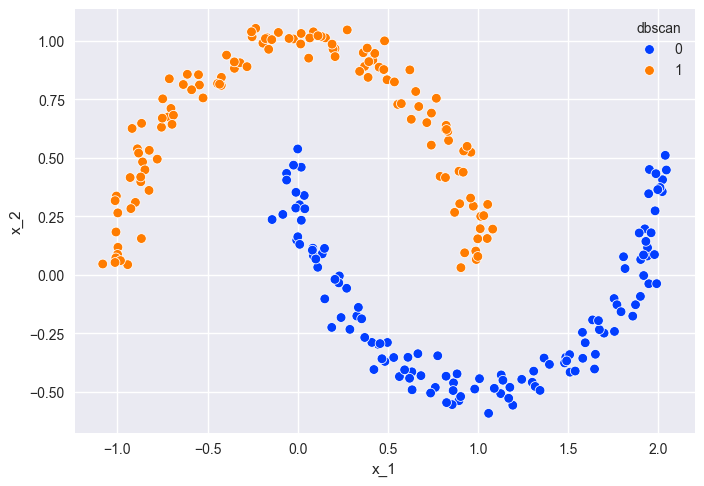

In [32]:
# GRaficamos la clusterización de las lunas con DBSCAN
sns.scatterplot(
    data=df_moons,
    x="x_1",
    y="x_2",
    hue="dbscan",
    palette="bright"
)
plt.show()

In [33]:
# Ahora, implementamos DBSCAN para los blobs
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_predict_blobs = dbscan.fit_predict(X)
df_blob["dbscan"] = y_predict_blobs

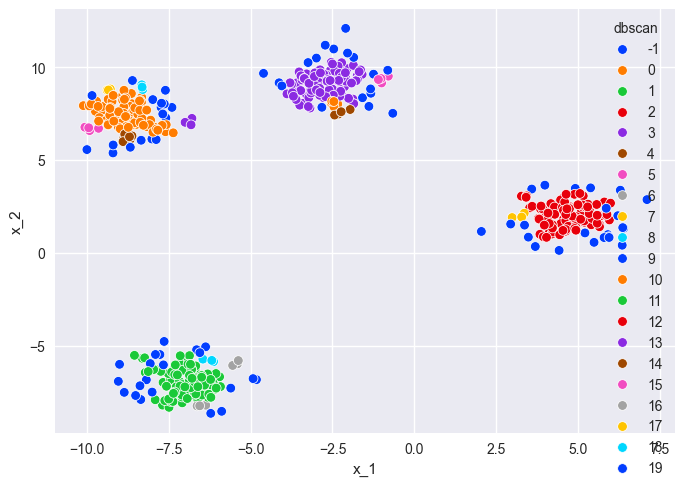

In [34]:
# Graficamos la clusterización de los blobs con DBSCAN
sns.scatterplot(
    data=df_blob,
    x="x_1",
    y="x_2",
    hue="dbscan",
    palette="bright"
)
plt.show()

In [35]:
# Como vemos, DBSCAN no es capaz de clusterizar correctamente los blobs utilizando estos 
# hiperparámetros. 

# Así, debemos encontrar los hiperparámetros adecuados para DBSCAN. Para ello, podemos 
# hacer lo siguiente:

from sklearn.neighbors import NearestNeighbors 

In [36]:
neighbors = NearestNeighbors(n_neighbors=3)
# El parámetro n_neighbors indica el número de vecinos que se considerarán para cada punto.

neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

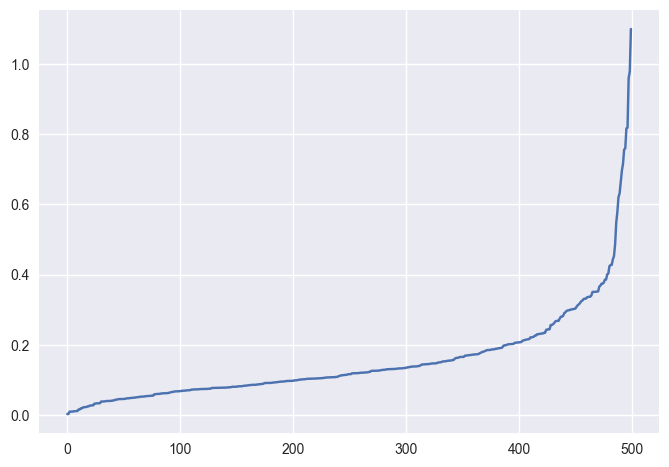

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [38]:
# Ahora, la técnica de la rodilla nos dice que el punto de inflexión de la curva es el
# valor de eps que debemos utilizar. En este caso, este valor está entre 0.2 y 0.5

eps_values = np.arange(0.2, 0.7, 0.05)
min_samples = np.arange(2, 10)

In [39]:
from itertools import product

In [40]:
dbscan_parametros = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_parametros:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_predict = dbscan.fit_predict(X)
    sil_scores.append(silhouette_score(X, y_predict))

In [41]:
df_parametros_tuning = pd.DataFrame.from_records(dbscan_parametros, columns=["eps", "min_samples"])
df_parametros_tuning["sil_score"] = sil_scores
pivot_data = pd.pivot_table(df_parametros_tuning, values="sil_score", index="min_samples", columns="eps")
pivot_data

eps              0.20      0.25      0.30      0.35      0.40      0.45  \
min_samples                                                               
2            0.116976 -0.046798 -0.032204  0.031230  0.114314  0.190795   
3           -0.036109 -0.123333 -0.039693  0.163150  0.241829  0.334067   
4           -0.211654 -0.155341 -0.024861  0.325637  0.421160  0.557065   
5           -0.447680 -0.189153  0.043152  0.244688  0.411749  0.464244   
6           -0.611466 -0.315895  0.003418  0.213551  0.415616  0.616948   
7           -0.700654 -0.429189 -0.200859  0.253837  0.471440  0.597370   
8           -0.602016 -0.526419 -0.246297  0.213737  0.426665  0.537848   
9           -0.236674 -0.662132 -0.395579  0.005024  0.367792  0.484903   

eps              0.50      0.55      0.60      0.65  
min_samples                                          
2            0.215334  0.386496  0.656109  0.671273  
3            0.384597  0.514614  0.654911  0.790896  
4            0.611104  0.756089  0.772133  0.790265  
5            0.600182  0.746750  0.767110  0.780621  
6            0.674557  0.710585  0.760448  0.770446  
7            0.655534  0.692865  0.734663  0.763602  
8            0.618730  0.679579  0.734663  0.755964  
9            0.574803  0.667453  0.726245  0.755964

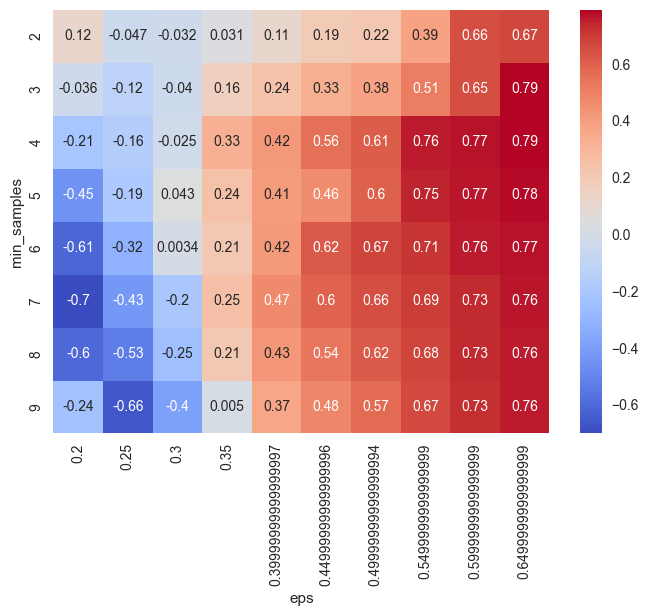

In [42]:
sns.heatmap(
    data=pivot_data,
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [43]:
# así, podemos seleccionar eps = 1.5 y min_samples = 3 (I do not know why xd)
dbscan = DBSCAN(eps=1.5, min_samples=3)
y_predict = dbscan.fit_predict(X)
df_blob["dbscan"] = y_predict

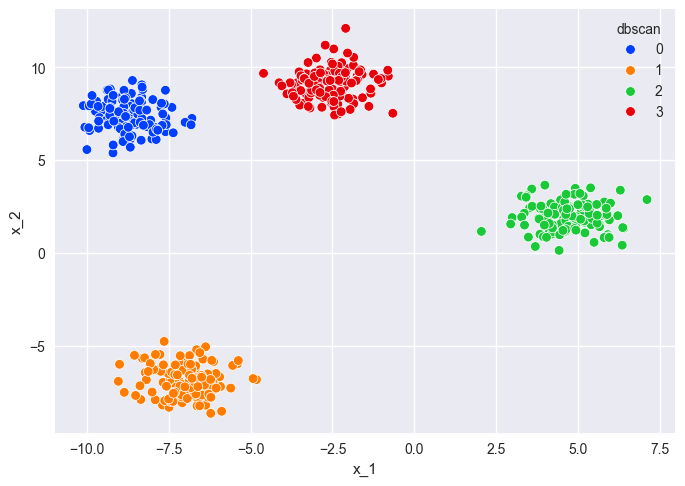

In [44]:
sns.scatterplot(
    data=df_blob,
    x="x_1",
    y="x_2",
    hue="dbscan",
    palette="bright"
)
plt.show()

# Proyecto Final

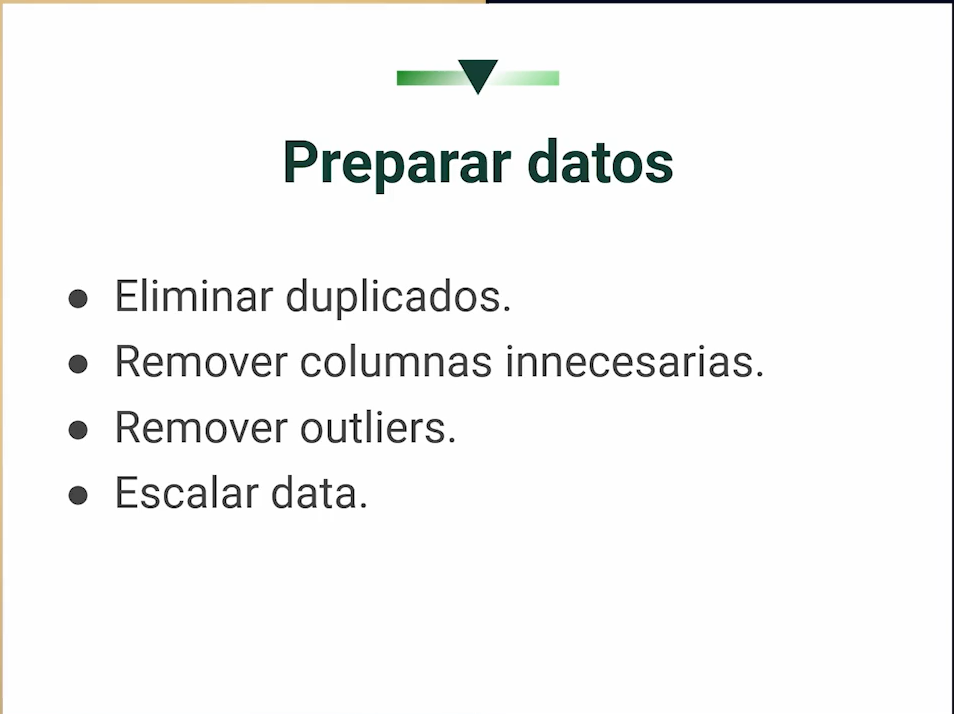

In [45]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [46]:
# Importamos nuestos datos:

df = pd.read_csv("C:/Users/eespitia/Documents/VSCode Notebooks/Cursos de Platzi/Datasets/Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [47]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [48]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [49]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [50]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [51]:
df[df.duplicated()]

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

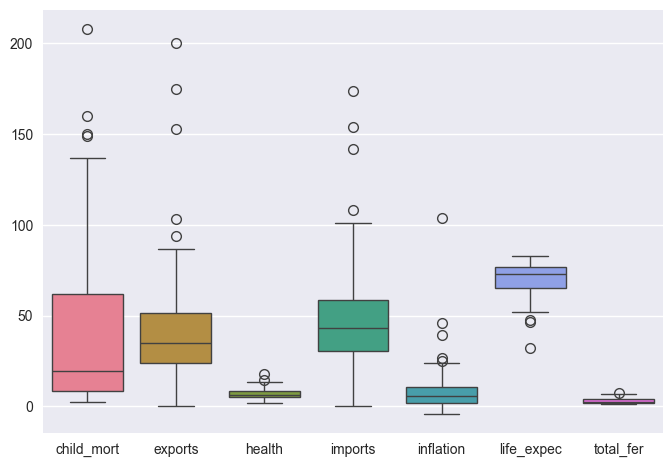

In [52]:
sns.boxplot(data=df.drop(["income", "gdpp"], axis=1))
plt.show()

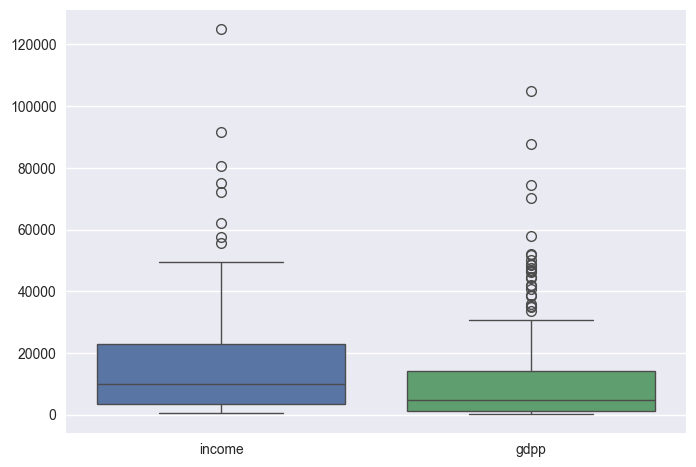

In [53]:
sns.boxplot(data=df[["income", "gdpp"]])
plt.show()

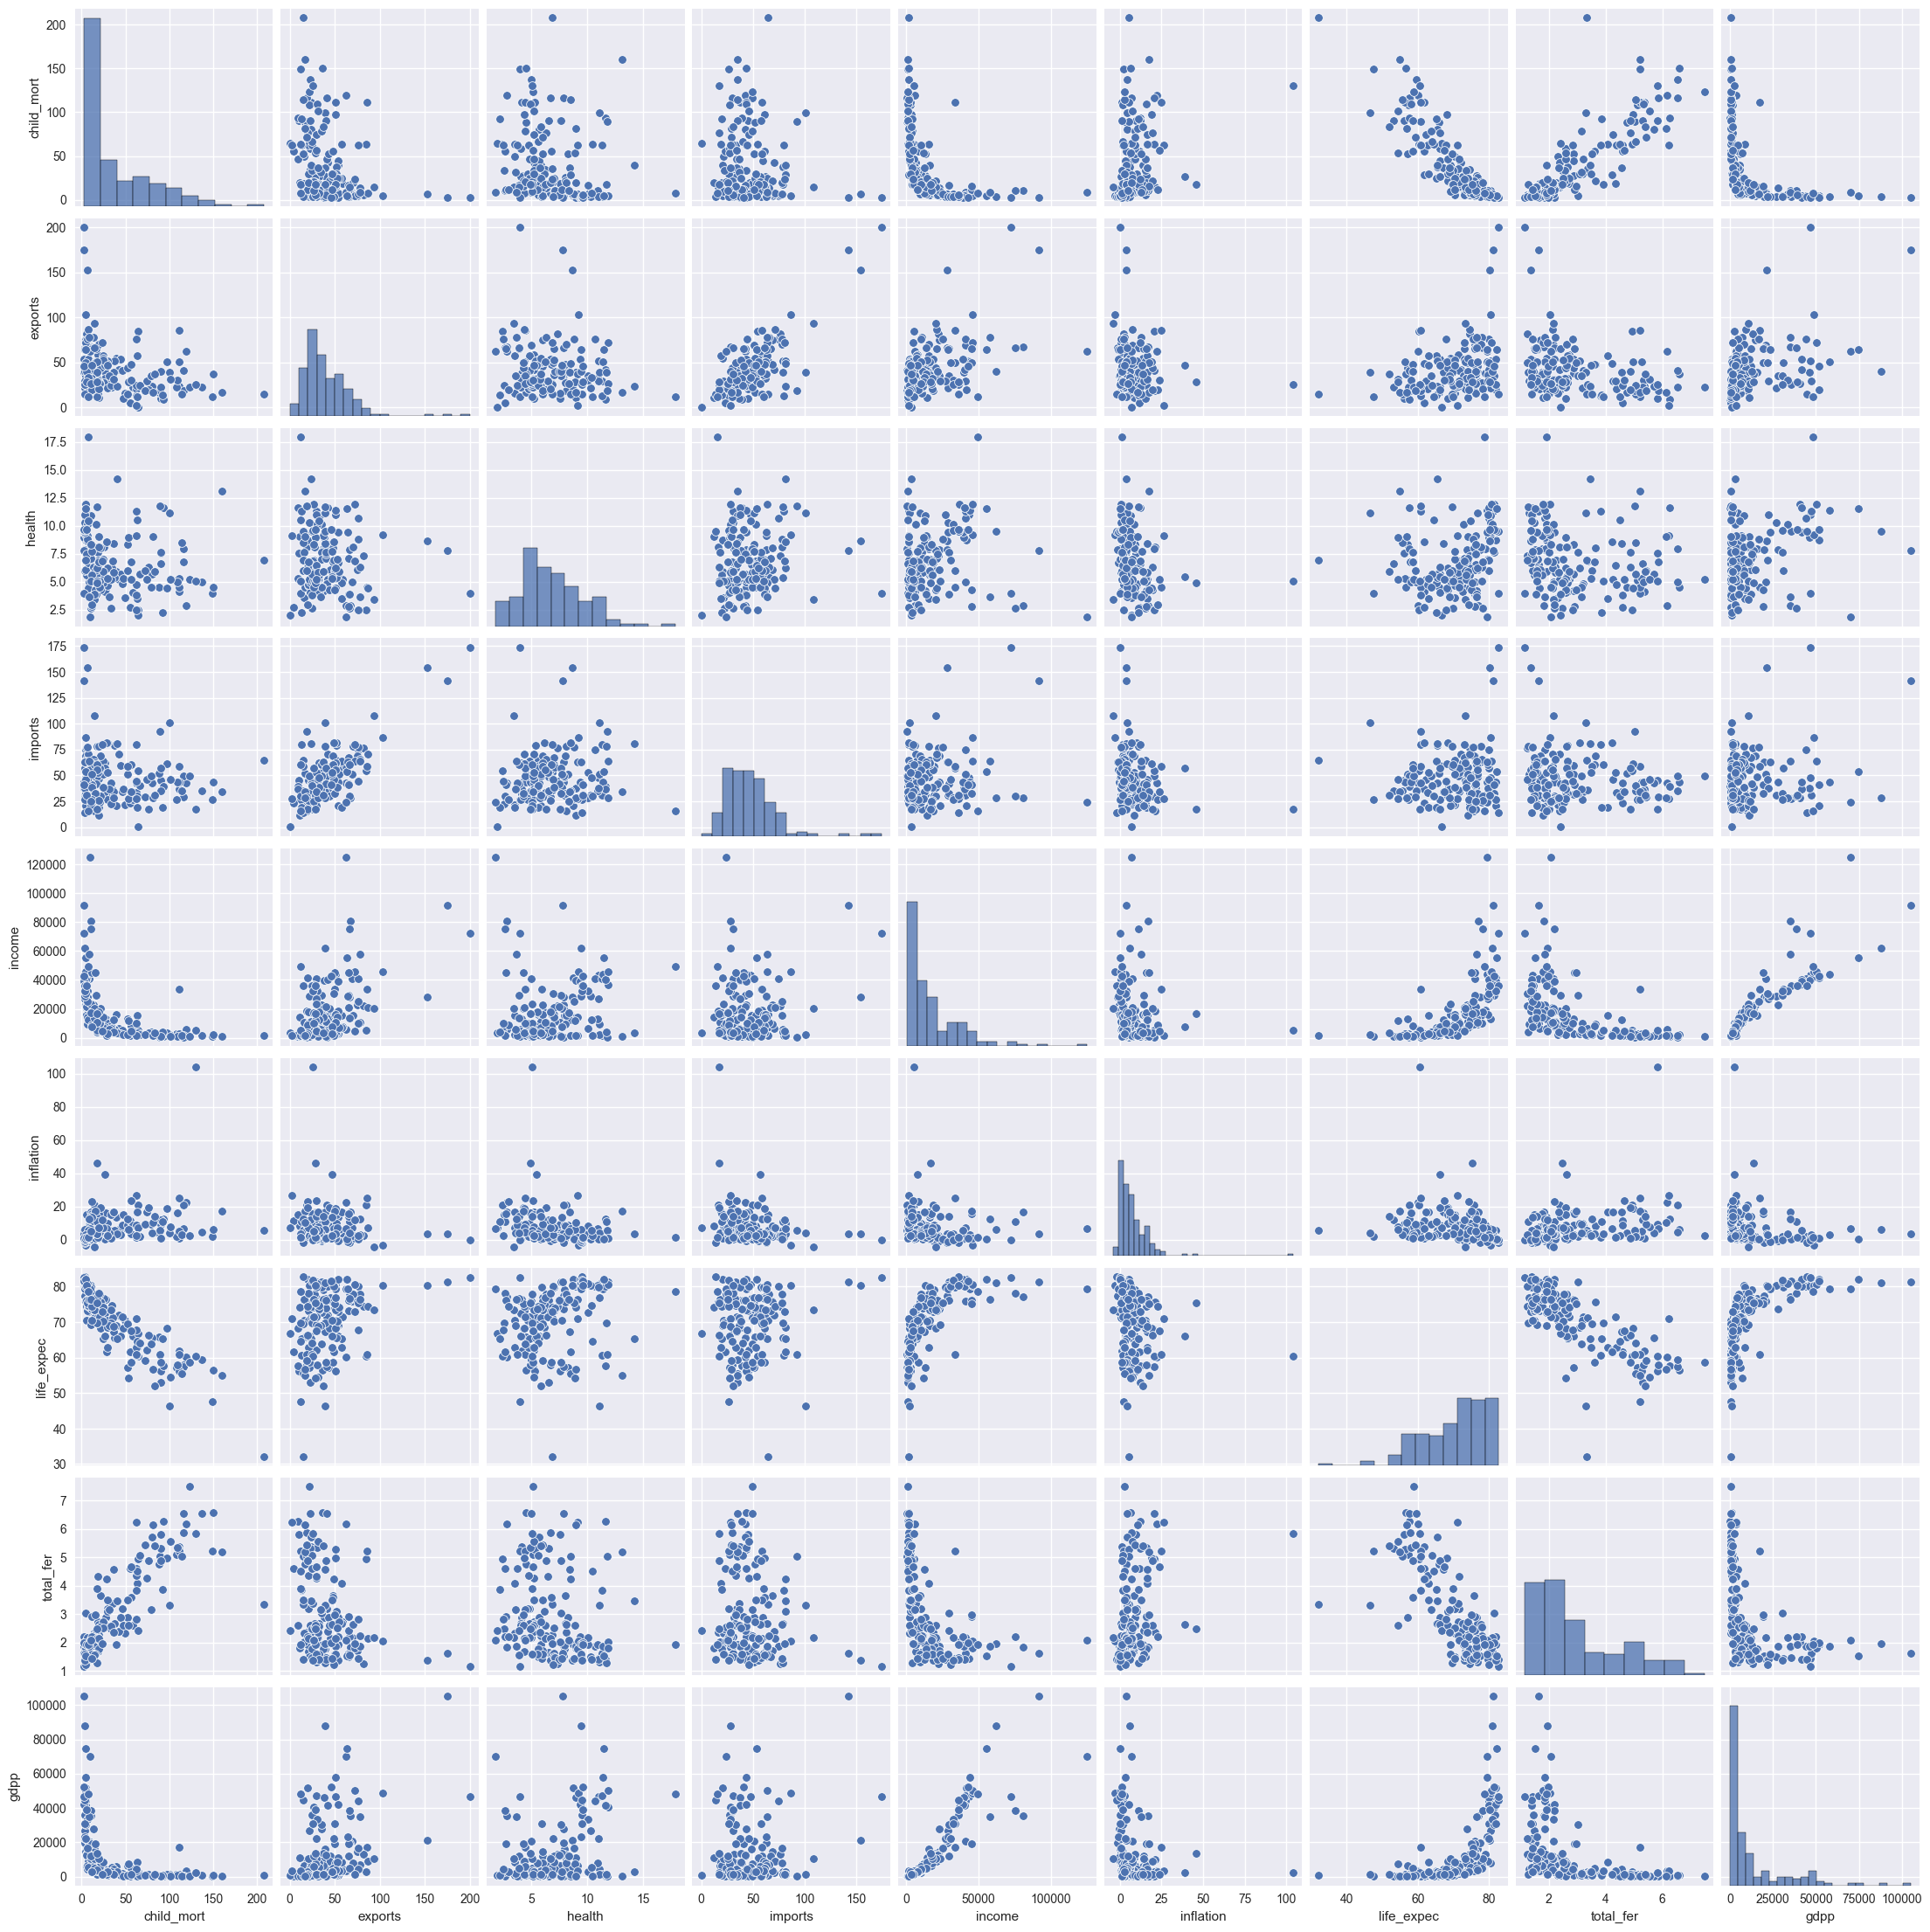

In [54]:
sns.pairplot(df)
plt.show()

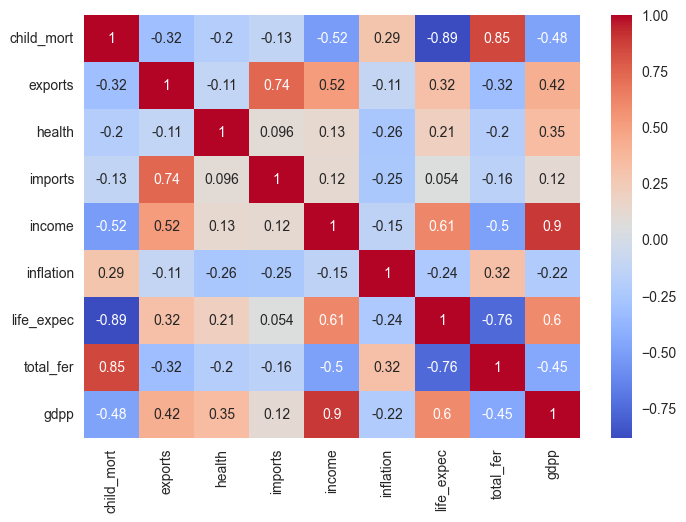

In [55]:
sns.heatmap(
    data=df.drop(["country"],axis=1).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [56]:
# Procedemos a escalar los datos:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["country"], axis=1))

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(
    {
        "Country":df["country"],
        "PC1":df_pca[:,0],
        "PC2":df_pca[:,1]
    }
)

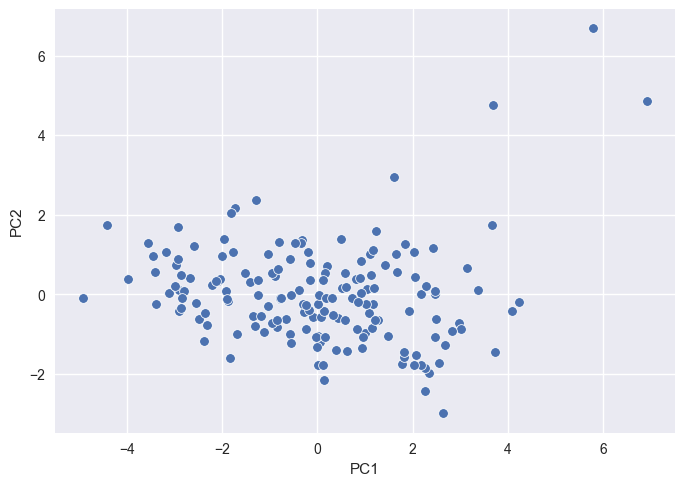

In [58]:
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2"
)
plt.show()

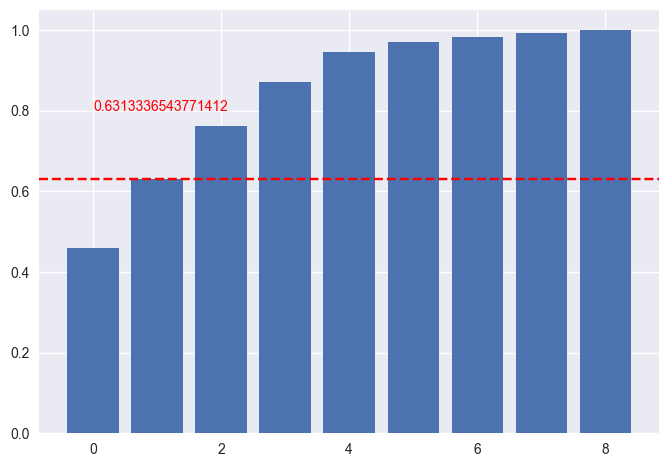

In [59]:
plt.bar(range(0,len(pca.explained_variance_ratio_)) , np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=np.cumsum(pca.explained_variance_ratio_)[1], color="red", linestyle="--")
plt.text(s=np.cumsum(pca.explained_variance_ratio_)[1], x=0, y=0.8, color="red")
plt.show()

In [60]:
# Importación de librerías para clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
varianza = []
silueta = []

for _ in range(2,10):
    kmeans = KMeans(n_clusters=_, random_state=42)
    y = kmeans.fit_predict(df_scaled)
    varianza.append(kmeans.inertia_)
    silueta.append(silhouette_score(df_scaled, y))

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

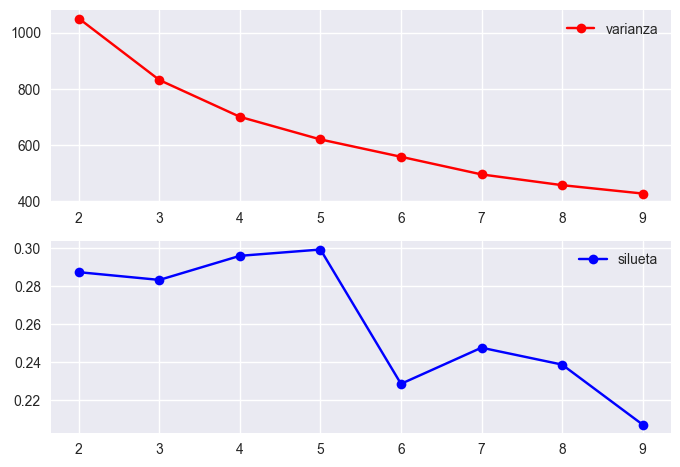

In [62]:
plt.subplots(2,1)

plt.subplot(2,1,1)
plt.plot(range(2,10), varianza, marker="o", color="red", label="varianza")
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(2,10), silueta, marker="o", color="blue", label="silueta")
plt.legend()
plt.show()    

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


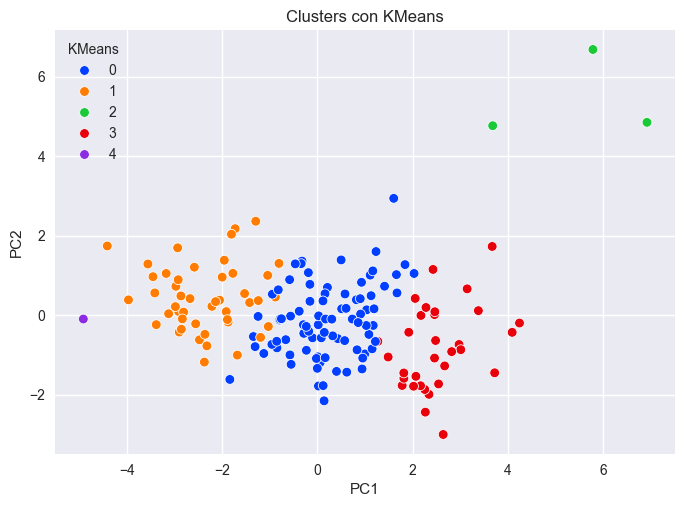

In [76]:
kmeans = KMeans(n_clusters=5, random_state=42)
y = kmeans.fit_predict(df_scaled)
df_pca["KMeans"] = y

sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="KMeans",
    palette="bright"
)
plt.title("Clusters con KMeans")
plt.show()

Utilizando Agglomerative Clustering

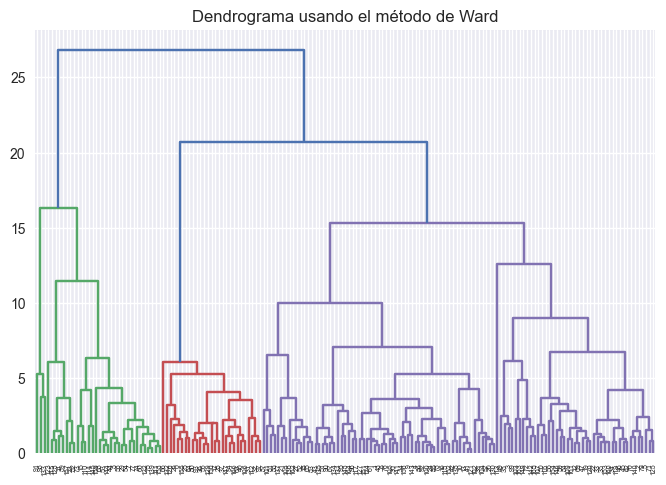

In [82]:
# Construimos el dendograma
dendrogram_plot = dendrogram(linkage(df_scaled, method="ward"))
plt.title("Dendrograma usando el método de Ward")
plt.show()

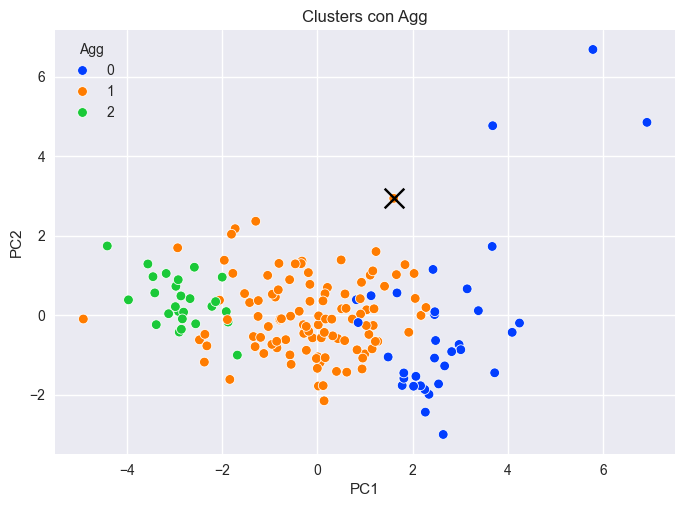

In [137]:
agg = AgglomerativeClustering(n_clusters=3)
y = agg.fit_predict(df_scaled)
df_pca["Agg"] = y

sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Agg",
    palette="bright"
)

pais = "Seychelles"
cor_x = df_pca[df_pca["Country"]==pais].reset_index(drop=True).iloc[0,1:3].to_numpy()[0]
cor_y = df_pca[df_pca["Country"]==pais].reset_index(drop=True).iloc[0,1:3].to_numpy()[1]

plt.scatter(x=cor_x, y=cor_y, marker="x", color="black", s=200)
plt.title("Clusters con Agg")
plt.show()

Utilizando DBSCAN

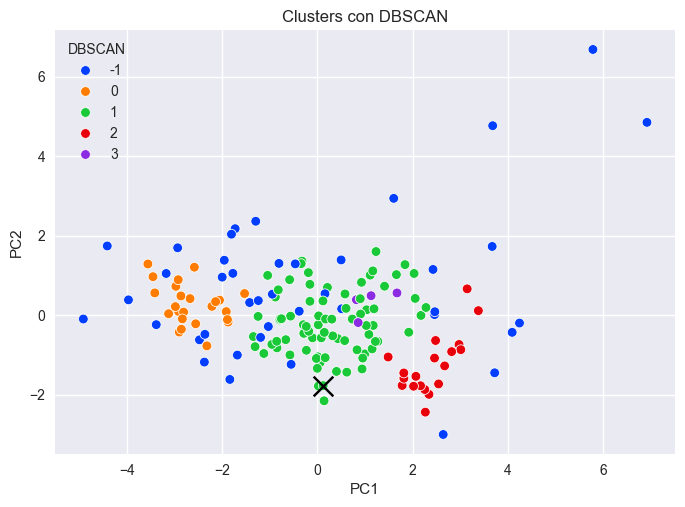

In [148]:
dbscan = DBSCAN(eps=1.2, min_samples=3)
y = dbscan.fit_predict(df_scaled)
df_pca["DBSCAN"] = y


sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="DBSCAN",
    palette="bright"
)

pais = "Colombia"
cor_x = df_pca[df_pca["Country"]==pais].reset_index(drop=True).iloc[0,1:3].to_numpy()[0]
cor_y = df_pca[df_pca["Country"]==pais].reset_index(drop=True).iloc[0,1:3].to_numpy()[1]

plt.scatter(x=cor_x, y=cor_y, marker="x", color="black", s=200)
plt.title("Clusters con DBSCAN")
plt.show()